# Import Library yang Dibutuhkan

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Import Data dari kaggle.com

In [ ]:
# Install kaggle
!pip install kaggle

# Import kaggle.json
from google.colab import files
files.upload()

# Membuat direktori kaggle dan copy file kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Mengganti permission/izin
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Download dataset yang diinginkan dengan syarat dataset berasal dari kaggle.com
!kaggle datasets download -d sgonkaggle/youtube-trend-with-subscriber
!unzip youtube-trend-with-subscriber.zip # Unzip file
yt = pd.read_csv('USvideos_modified.csv') # Baca file
yt

  0% 0.00/2.45M [00:00<?, ?B/s]
100% 2.45M/2.45M [00:00<00:00, 82.0MB/s]
Archive:  youtube-trend-with-subscriber.zip
  inflating: USvideos_modified.csv   


,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,tag_appeared_in_title_count,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,False,False,0,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,False,False,0,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,False,False,8,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,False,False,3,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,False,False,1,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,CvkOWb1U-LI,2018-03-05,2018-03-02,19,28,Techquickie,230223,10926,446,791,False,False,3,True,Why Are Progress Bars Wrong So Often?,progress|bar|estimate|time|windows|inaccurate|...,Why do progress bars you see when installing a...,1,3,25,102,23,1980988.0
4543,_CFJ1u-DIBc,2018-03-05,2018-03-02,19,28,Tech Insider,128591,2924,316,564,False,False,2,True,Why Does Bluetooth Still Suck?,Tech Insider|TI|Tech|Science|Innovation|Digita...,"Bluetooth has been around for over 20 years, b...",1,3,140,407,17,1420833.0
4544,Juad74hE6rs,2018-03-05,2018-03-01,16,26,Gemma Stafford,55076,3436,35,621,False,False,7,True,Crazy Frosting Recipe: The Best Buttercream Fr...,Frosting|Crazy Frosting|Buttercream Frosting|B...,One Frosting. Any Flavor!\nCRAZY FROSTING RECI...,1,4,75,147,24,1549469.0
4545,n_S8d_1KVhU,2018-03-05,2018-03-01,18,20,Scott Manley,48505,2504,17,350,False,False,2,True,How Satellites Capture 400 Megapixel Images Of...,himawari|goes-16|goes-r|goes-s|weather|meteoro...,The Advanced Baseline Imager is the state of t...,1,4,13,20,8,692776.0


# Data Cleansing

In [ ]:
# Menghapus kolom yang bukan numerik
# Tujuan dari penghapusan ini hanyalah untuk mencari apakah ada data bernilai negatif atau tidak
yt_now = yt.drop(columns=['video_id', 'last_trending_date', 'publish_date', 'publish_hour', 'category_id', 'channel_title', 'comments_disabled',
                          'ratings_disabled', 'title', 'tag_appeared_in_title', 'tags', 'description'])

# Akan dicari apakah ada data bernilai negatif atau tidak
# Jika ada, maka outputnya adalah True. Jika tidak, maka False
(yt_now.values < 0).any()

False

In [ ]:
# Cek apakah ada data kosong atau tidak
yt.isnull().sum()

video_id                         0
last_trending_date               0
publish_date                     0
publish_hour                     0
category_id                      0
channel_title                    0
views                            0
likes                            0
dislikes                         0
comment_count                    0
comments_disabled                0
ratings_disabled                 0
tag_appeared_in_title_count      0
tag_appeared_in_title            0
title                            0
tags                           208
description                     89
trend_day_count                  0
trend.publish.diff               0
trend_tag_highest                0
trend_tag_total                  0
tags_count                       0
subscriber                      22
dtype: int64

In [ ]:
# Terlihat bahwa hanya terdapat satu kolom bertipe numerik, yaitu kolom 'subscriber'
# Karena tidak terdapat data aneh, ganti missing data (NaN) dengan nilai rata-rata pada kolom 'subscriber'
yt['subscriber'] = yt['subscriber'].fillna(yt['subscriber'].mean())

In [ ]:
# Cek ulang apakah masih ada data kosong di kolom 'subscriber' atau tidak
yt['subscriber'].isnull().sum()

0

# Dimensi File

In [ ]:
# Menghitung dimensi file
yt.shape

(4547, 23)

# Ukuran File

In [ ]:
# Menghitung ukuran file
file_size = os.path.getsize('USvideos_modified.csv')
print('Ukuran file:', file_size, '')

Ukuran file: 6291178 


# Tipe Data
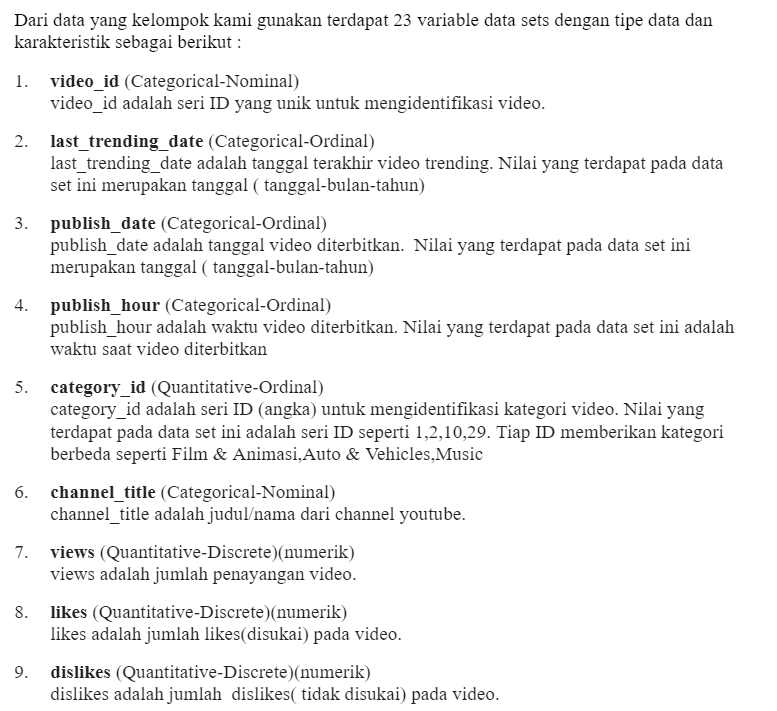

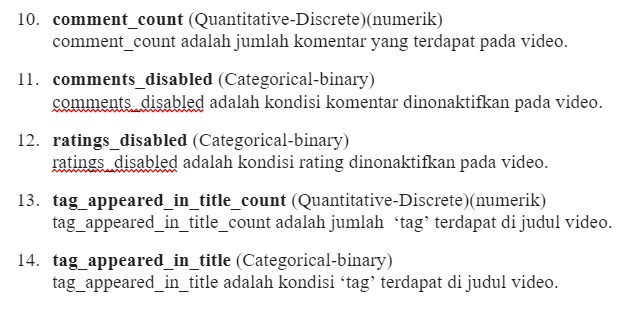

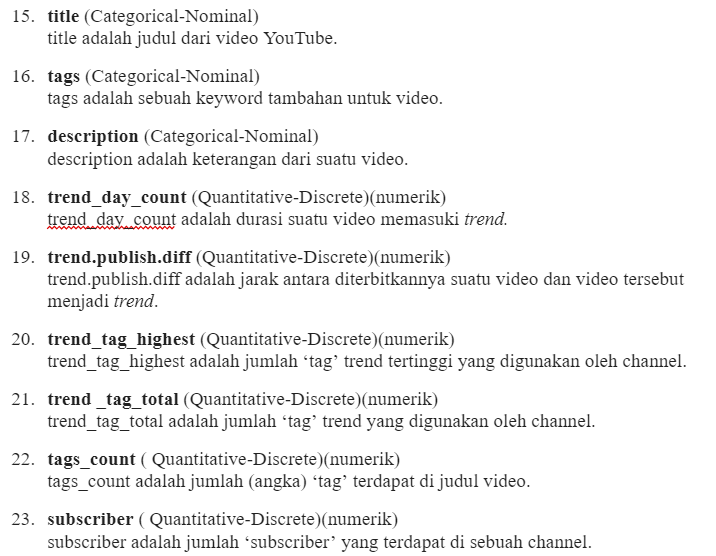
<!-- 1. video_id : Categorical-Nominal
1. last_trending_date : Categorical-Ordinal
1. publish_date : Categorical-Ordinal
1. publish_hour : Categorical-Ordinal
1. category_id : Quantitative-Ordinal
1. channel_title : Categorical-Nominal
1. views : Quantitative-Discrete (numerik)
1. likes : Quantitative-Discrete (numerik)
1. dislikes : Quantitative-Discrete (numerik)
1. comment_count : Quantitative-Discrete (numerik)
1. comments_disabled : Categorical-Binary
1. ratings_disabled : Categorical-Binary
1. tag_appeared_in_title_count : Quantitative-Discrete (numerik)
1. tag_appeared_in_title : Categorical-Binary
1. title : Categorical-Nominal
1. tags : Categorical-Nominal
1. description : Categorical-Nominal
1. trend_day_count : Quantitative-Discrete (numerik)
1. trend.publish.diff : Quantitative-Discrete (numerik)
1. trend_tag_highest : Quantitative-Discrete (numerik)
1. trend_tag_total : Quantitative-Discrete (numerik)
1. tags_count : Quantitative-Discrete (numerik)
1. subscriber : Quantitative-Discrete (numerik) -->

# Statistics

In [ ]:
# Sampel Data
yt

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,tag_appeared_in_title_count,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,False,False,0,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,False,False,0,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,False,False,8,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,False,False,3,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,False,False,1,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,CvkOWb1U-LI,2018-03-05,2018-03-02,19,28,Techquickie,230223,10926,446,791,False,False,3,True,Why Are Progress Bars Wrong So Often?,progress|bar|estimate|time|windows|inaccurate|...,Why do progress bars you see when installing a...,1,3,25,102,23,1980988.0
4543,_CFJ1u-DIBc,2018-03-05,2018-03-02,19,28,Tech Insider,128591,2924,316,564,False,False,2,True,Why Does Bluetooth Still Suck?,Tech Insider|TI|Tech|Science|Innovation|Digita...,"Bluetooth has been around for over 20 years, b...",1,3,140,407,17,1420833.0
4544,Juad74hE6rs,2018-03-05,2018-03-01,16,26,Gemma Stafford,55076,3436,35,621,False,False,7,True,Crazy Frosting Recipe: The Best Buttercream Fr...,Frosting|Crazy Frosting|Buttercream Frosting|B...,One Frosting. Any Flavor!\nCRAZY FROSTING RECI...,1,4,75,147,24,1549469.0
4545,n_S8d_1KVhU,2018-03-05,2018-03-01,18,20,Scott Manley,48505,2504,17,350,False,False,2,True,How Satellites Capture 400 Megapixel Images Of...,himawari|goes-16|goes-r|goes-s|weather|meteoro...,The Advanced Baseline Imager is the state of t...,1,4,13,20,8,692776.0


In [ ]:
# Sampel data yang telah diurutkan berdasarkan "publish_hour" dari terkecil
yt.sort_values(["publish_hour"], ascending=[1])

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,tag_appeared_in_title_count,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
1214,A_fUji0jTAE,2017-12-13,2017-12-06,0,23,Pittsburgh Dad,243102,4570,247,679,False,False,1,True,Dad Reacts to Steelers vs Bengals (Week 13),Pittsburgh Dad|Curt Wootton|Chris Preksta|Stee...,Dad reacts to the violent clash between NFL ri...,6,7,488,1289,31,147990.0
3558,C535gMNdiDk,2018-02-04,2018-01-29,0,27,Check It Out,894787,3192,1146,757,False,False,7,True,Cutest Rat taking a shower like a Human / Rata...,rat|taking|shower|rat taking a shower|pets|rat...,Watch as this little rat washes himself in the...,1,6,32,97,34,16925.0
1726,oYvw0GryNs8,2017-12-19,2017-12-18,0,23,IISuperwomanII,1629871,159941,2175,12628,False,False,2,True,Really Offensive Video (ft. Shane Dawson),iisuperwomanii|superwoman|team|super”|comedy|s...,I'm all for learning and growing but sometimes...,1,1,441,637,31,13357328.0
4307,oCAbvclXL6I,2018-03-05,2018-02-24,0,24,MeganBatoon,191871,10780,380,882,False,False,7,True,I Tried Following a PatrickStarrr Khloe Kardas...,megan batoon|comedy|diy|cooking|funny|how|to|t...,But are you subscribed tho: https://www.youtub...,9,9,488,1758,28,874240.0
4310,l_eR85kmWbY,2018-03-05,2018-02-24,0,28,Because Science,78528,3546,62,561,False,False,1,True,The Most Toxic Kiss on Earth | Because Science...,Nerdist|Fvid|Because Science|Kyle Hill|batman|...,Get a 30-day free trial and watch Because Scie...,9,9,18,42,10,216791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,NooW_RbfdWI,2018-02-14,2018-02-04,23,24,Universal Pictures,21113889,254342,7076,20099,False,False,2,True,Jurassic World: Fallen Kingdom - Official Trai...,Jurassic World|Fallen Kingdom|Dinosaur|T-Rex|C...,Jurassic World: Fallen Kingdom \nIn Theaters J...,10,10,11,88,18,1446544.0
3560,9Szts88zY4o,2018-02-05,2018-02-04,23,24,Star Wars,2580817,74716,4678,14342,False,False,5,True,Solo: A Star Wars Story Big Game TV Spot (:45),star wars|han solo|solo|emilia clarke|big game...,Solo: A Star Wars Story. Trailer Tomorrow. In ...,1,1,73,194,16,2516341.0
346,MMGrzOu1amQ,2017-11-19,2017-11-15,23,24,Simply Nailogical,2259888,99803,1074,15766,False,False,5,True,HOLO CAPPUCCINO | DIY Diamond Cappuccino test ...,nails|nail art|nail tutorial|beauty tutorial|n...,Could I get a grande double-sweet no foam holo...,3,4,16,172,33,5008492.0
3717,EP_2NXe0_1g,2018-02-08,2018-01-31,23,25,CBS New York,548993,855,602,1696,False,False,1,True,"Kiss Between Tom Brady, 11-Year-Old Son Raises...",CBS2 News At 5|Tom Brady|Facebook,The moment was shown as part of a Facebook doc...,2,8,13,24,3,0.0


In [ ]:
# Sampel data yang telah diurutkan berdasarkan "views" dari terkecil
yt.sort_values(["views"], ascending=[1])

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,tag_appeared_in_title_count,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
3164,y6KYFcta4SE,2018-01-28,2018-01-23,15,25,Newsy,559,9,0,4,False,False,4,True,"1 dead, others injured after Ky. school shooting",shooting|kentucky|breaking news|u.s. news|mars...,Kentucky Gov. Matt Bevin confirmed there was a...,3,5,57,135,11,63781.0
315,-JVITToppE0,2017-11-17,2017-11-13,20,17,GoDucksdotcom,704,10,2,5,False,False,0,False,Coach Taggart Monday Presser Ahead of Arizona,Oregon|Ducks|college athletics|college footbal...,Coach Taggart addresses the media ahead of the...,2,4,8,29,10,41670.0
3212,dQMZLXaa1L8,2018-01-29,2018-01-10,23,17,Palo Alto Online,745,1,0,0,False,False,0,False,Artwork Forge,NaN,Artwork Forge II - an art installation created...,3,19,0,0,0,1553.0
2822,zeQaJGkFyqQ,2018-01-18,2018-01-16,12,25,Associated Press,748,9,0,0,True,False,7,True,"Raw: 3 South Carolina Deputies, 1 Officer Shot",news|associated press|ap|ap online|associated ...,Three deputies and one police officer were sho...,1,2,183,581,31,793607.0
160,qg0GdM60syI,2017-11-14,2017-03-31,21,27,90s Commercials,773,2,0,0,False,False,1,True,Huffy Metaloid Bicycle Commercial 1997,90s commercials|Huffy,Anyone have one of those?,1,228,1,2,2,1752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,BhIEIO0vaBE,2018-02-14,2018-02-04,20,22,Kylie Jenner,56111957,0,0,0,True,True,0,False,To Our Daughter,Kylie Jenner|Kylie|Travis Scott|Baby|Annoucement,Directed by Tyler Ross @wttyler\nMusic by Jaco...,10,10,32,69,5,2450096.0
2181,LsoLEjrDogU,2018-01-12,2018-01-04,4,10,Bruno Mars,57951412,1919583,73239,133601,False,False,7,True,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,Bruno Mars|Finesse|Cardi B|Finesse Remix|Bruno...,Finesse (Remix) Feat. Cardi B Available Now: h...,7,8,124,294,14,20307317.0
855,6ZfuNTqbHE8,2017-12-08,2017-11-29,13,24,Marvel Entertainment,91933007,2625661,53709,350458,False,False,4,True,Marvel Studios' Avengers: Infinity War Officia...,marvel|comics|comic books|nerdy|geeky|super he...,There was an idea… Avengers: Infinity War. In ...,9,9,41,142,11,6287032.0
328,TyHvyGVs42U,2017-11-26,2017-11-17,5,10,LuisFonsiVEVO,102012605,2376636,117196,134224,False,False,7,True,"Luis Fonsi, Demi Lovato - Échame La Culpa",Luis|Fonsi|Demi|Lovato|Échame|La|Culpa|UMLE|La...,“Échame La Culpa” disponible ya en todas las p...,10,9,124,163,11,18320865.0


In [ ]:
# Sampel data yang telah diurutkan berdasarkan "likes" dari terbesar
yt.sort_values(["likes"], ascending=[0])

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,tag_appeared_in_title_count,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
1149,FlsCjmMhFmw,2017-12-14,2017-12-06,17,24,YouTube Spotlight,149376127,3093544,1643059,810698,False,False,3,True,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Rewind|Rewind 2017|youtube rewind 2017|#YouTub...,"YouTube Rewind 2017. Celebrating the videos, p...",8,8,69,293,37,27221198.0
681,kTlv5_Bs8aw,2017-12-01,2017-11-24,9,10,ibighit,36857298,2729292,47896,546100,False,False,1,True,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,7,7,34,65,6,9883887.0
4464,OK3GJ0WIQ8s,2018-03-05,2018-03-01,15,10,ibighit,21582276,2626585,27633,471584,False,False,0,False,j-hope 'Daydream (백일몽)' MV,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,4,4,34,65,6,9883887.0
855,6ZfuNTqbHE8,2017-12-08,2017-11-29,13,24,Marvel Entertainment,91933007,2625661,53709,350458,False,False,4,True,Marvel Studios' Avengers: Infinity War Officia...,marvel|comics|comic books|nerdy|geeky|super he...,There was an idea… Avengers: Infinity War. In ...,9,9,41,142,11,6287032.0
328,TyHvyGVs42U,2017-11-26,2017-11-17,5,10,LuisFonsiVEVO,102012605,2376636,117196,134224,False,False,7,True,"Luis Fonsi, Demi Lovato - Échame La Culpa",Luis|Fonsi|Demi|Lovato|Échame|La|Culpa|UMLE|La...,“Échame La Culpa” disponible ya en todas las p...,10,9,124,163,11,18320865.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,nx1R-eHSkfM,2017-12-07,2017-11-29,14,10,Snapchat,3511909,0,0,0,True,True,3,True,The New Snapchat in 60 Seconds,new snapchat|version 2|snap inc|brandnew|updat...,"Evan Spiegel, co-founder and CEO, explains the...",8,8,8,27,11,163858.0
192,wRGldR_SQAA,2017-11-14,2017-11-09,18,22,Steve Kovach,2259,0,0,0,False,False,0,False,Apple Clips sample,NaN,Clips 2.0 lets you use augmented reality and s...,1,5,0,0,0,325.0
4516,_EMxJMU1dCo,2018-03-05,2018-03-02,18,26,Tati,839375,0,0,0,True,True,3,True,GET READY WITH ME | Halo Beauty Launch Day,YouTube|Beauty|Makeup|Tutorial|Review|Tati|Wes...,"Unfortunately, I had to disable comments due t...",2,3,113,543,14,3887047.0
2145,aBL027wEtg8,2018-01-09,2018-01-01,5,10,mariahxlambily,1216232,0,0,5286,False,True,4,True,Mariah Carey - Live At Dick Clark's New Year's...,Mariah|Carey|Mariah Carey|Vocals|Vocal Fail|Vo...,Instagram - @mxlambily\nTwitter - @mxlambily\n...,7,8,171,433,26,41039.0


In [ ]:
# Sampel data yang telah diurutkan berdasarkan "dislikes" dari terbesar
yt.sort_values(["dislikes"], ascending=[0])

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,tag_appeared_in_title_count,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
2134,QwZT7T-TXT0,2018-01-09,2018-01-02,16,24,Logan Paul Vlogs,37539570,1402578,1674420,1361580,False,False,0,False,So Sorry.,logan paul vlog|logan paul|logan|paul|olympics...,NaN,7,7,441,818,20,16927506.0
1149,FlsCjmMhFmw,2017-12-14,2017-12-06,17,24,YouTube Spotlight,149376127,3093544,1643059,810698,False,False,3,True,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Rewind|Rewind 2017|youtube rewind 2017|#YouTub...,"YouTube Rewind 2017. Celebrating the videos, p...",8,8,69,293,37,27221198.0
3067,oWjxSkJpxFU,2018-02-01,2018-01-24,18,29,Logan Paul Vlogs,24286474,1988746,497847,658130,False,False,1,True,Suicide: Be Here Tomorrow.,logan paul vlog|logan paul|logan|paul|logan pa...,National Suicide Prevention Lifeline\nCall 1-8...,8,8,18,92,16,16927506.0
3747,_5d-sQ7Fh5M,2018-02-09,2018-02-04,22,24,Logan Paul Vlogs,14161833,1216340,291900,436698,False,False,3,True,LOGAN PAUL IS BACK!,logan paul vlog|logan paul|logan|paul|olympics...,Do It Different. Be a Maverick ► https://ShopL...,2,5,441,898,29,16927506.0
1749,LFhT6H6pRWg,2017-12-21,2017-12-13,22,22,Daily Caller,1205682,9572,228426,29634,False,False,2,True,PSA from Chairman of the FCC Ajit Pai,thedc|dc|washington dc|washington|the district...,Ajit Pai has been at the heart of the net neut...,3,8,183,470,28,1027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,RIAVKKzOocc,2018-01-05,2017-12-26,7,24,Josh Levine,2086,9,0,0,False,False,0,False,Animal electricity - Fingerling Fart Monkey Te...,NaN,Its object is to show the excitability of the ...,6,10,0,0,0,607.0
1946,_oZIbFolJTw,2017-12-28,2017-11-29,3,1,VOsprey22,3598,28,0,3,False,False,1,True,RGB Pixel Christmas Tree,raspberry pi|ws2811|sandevices e682|christmas ...,"Christmas Tree with Trolls, Moana, and Christm...",6,29,6,19,7,16.0
1353,QOdVw75Vbv4,2017-12-12,2017-12-07,20,24,New York Magazine,3479,34,0,4,False,False,2,True,The Evolution of the Movie Trailer,movie|trailer|trailers,Movie marketing has always been an art form in...,2,5,151,260,3,89945.0
3990,LR2edIotyE8,2018-02-19,2018-02-09,23,24,TV One,202879,0,0,194,False,True,2,True,Did Beyonce Have To Check An Actress Talking T...,TV One|Radio One|Interactive One|Beyonce|JAY-Z...,Only Tiffany Haddish can say she had THIS kind...,5,10,488,1001,11,69011.0


In [ ]:
# Mencari statistik pada data bertipe quantitative-discrete (numerik)
yt_now.describe()

,views,likes,dislikes,comment_count,tag_appeared_in_title_count,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
count,4.547000e+03,4.547000e+03,4.547000e+03,4.547000e+03,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4.525000e+03
mean,1.265665e+06,3.919696e+04,2.616788e+03,4.938788e+03,2.961293,4.830658,34.429954,130.335386,437.941060,19.209369,3.164303e+06
std,4.526133e+06,1.419793e+05,3.662803e+04,3.110122e+04,2.482547,2.614707,247.514298,150.400756,616.584168,12.452361,4.831613e+06
min,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,9.089650e+04,1.486000e+03,7.600000e+01,2.260000e+02,1.000000,3.000000,5.000000,22.000000,68.000000,9.000000,2.466470e+05
50%,3.188400e+05,7.397000e+03,2.910000e+02,8.540000e+02,3.000000,5.000000,6.000000,85.000000,217.000000,18.000000,1.198769e+06
75%,1.006673e+06,2.557550e+04,1.023000e+03,2.862500e+03,4.000000,7.000000,7.000000,151.000000,515.000000,29.000000,3.766915e+06
max,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06,18.000000,14.000000,4215.000000,488.000000,3644.000000,69.000000,2.867694e+07


In [ ]:
# Percentile
print(f'''Percentile 10%:
{yt_now.quantile(0.1)}\n''')

print(f'''Percentile 25%:
{yt_now.quantile(0.25)}\n''')

print(f'''Percentile 50%:
{yt_now.quantile(0.5)}\n''')

print(f'''Percentile 75%:
{yt_now.quantile(0.75)}\n''')

print(f'''Percentile 90%:
{yt_now.quantile(0.9)}''')

Percentile 10%:
views                          24853.0
likes                            215.0
dislikes                          15.0
comment_count                     41.0
tag_appeared_in_title_count        0.0
trend_day_count                    1.0
trend.publish.diff                 2.0
trend_tag_highest                  4.0
trend_tag_total                   14.0
tags_count                         4.0
subscriber                     10245.0
Name: 0.1, dtype: float64

Percentile 25%:
views                           90896.5
likes                            1486.0
dislikes                           76.0
comment_count                     226.0
tag_appeared_in_title_count         1.0
trend_day_count                     3.0
trend.publish.diff                  5.0
trend_tag_highest                  22.0
trend_tag_total                    68.0
tags_count                          9.0
subscriber                     246647.0
Name: 0.25, dtype: float64

Percentile 50%:
views                       

In [ ]:
# Mencari nilai maksimum
print(f'''Nilai maksimum:
{yt_now.max()}\n''')

# Mencari nilai minimum
print(f'''Nilai minimum:
{yt_now.min()}''')

Nilai maksimum:
views                          149376127.0
likes                            3093544.0
dislikes                         1674420.0
comment_count                    1361580.0
tag_appeared_in_title_count           18.0
trend_day_count                       14.0
trend.publish.diff                  4215.0
trend_tag_highest                    488.0
trend_tag_total                     3644.0
tags_count                            69.0
subscriber                      28676937.0
dtype: float64

Nilai minimum:
views                          559.0
likes                            0.0
dislikes                         0.0
comment_count                    0.0
tag_appeared_in_title_count      0.0
trend_day_count                  1.0
trend.publish.diff               0.0
trend_tag_highest                0.0
trend_tag_total                  0.0
tags_count                       0.0
subscriber                       0.0
dtype: float64


In [ ]:
# Mencari nilai range tiap data numerik
print(f'''Nilai range:
{yt_now.max()-yt_now.min()}\n''')


Nilai range:
views                          149375568.0
likes                            3093544.0
dislikes                         1674420.0
comment_count                    1361580.0
tag_appeared_in_title_count           18.0
trend_day_count                       13.0
trend.publish.diff                  4215.0
trend_tag_highest                    488.0
trend_tag_total                     3644.0
tags_count                            69.0
subscriber                      28676937.0
dtype: float64



In [ ]:
# Distribusi Frekuensi
for i in yt_now:
  freq = yt[i].value_counts()
  print(f'''{i}:\n{freq}
  ''')

views:
8493       3
2084       2
2620       2
11156      2
700096     2
          ..
23877      1
527683     1
703909     1
1031489    1
212992     1
Name: views, Length: 4532, dtype: int64
  
likes:
0         27
2         10
20         9
30         9
7          8
          ..
24051      1
9278       1
1082       1
216119     1
8130       1
Name: likes, Length: 3949, dtype: int64
  
dislikes:
0        94
1        52
4        37
2        33
3        31
         ..
646       1
654       1
662       1
35479     1
4090      1
Name: dislikes, Length: 1842, dtype: int64
  
comment_count:
0         111
4          26
1          26
2          23
3          18
         ... 
127481      1
1689        1
5787        1
1693        1
1945        1
Name: comment_count, Length: 2645, dtype: int64
  
tag_appeared_in_title_count:
2     860
3     760
0     701
1     699
4     506
5     383
6     262
7     150
8      80
9      50
10     33
11     28
12     12
13      8
15      6
14      5
17      3
18     

# Visualisasi

In [ ]:
# Untuk memudahkan visualisasi, kita akan membuat kolom baru "year" dan "month" 
# dengan data diambil dari kolom "publish_date"
yt["year"] = pd.DatetimeIndex(yt["publish_date"]).year
yt["month"] = pd.DatetimeIndex(yt["publish_date"]).month

### Perbandingan Kategori

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


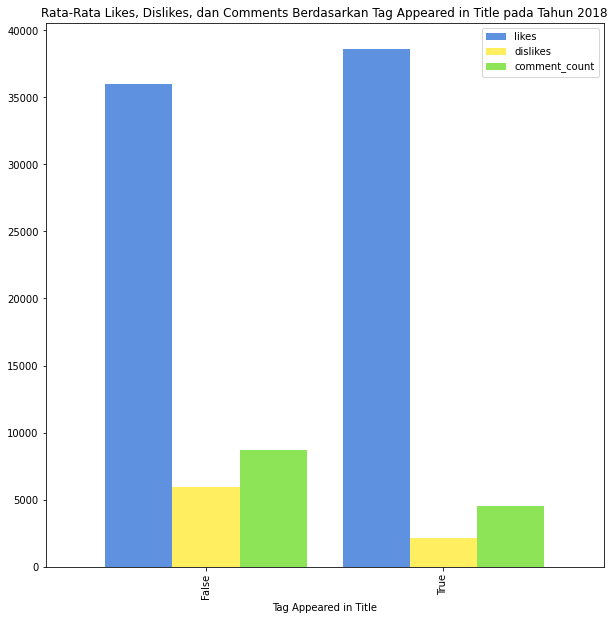

In [ ]:
data2018 = yt.loc[(yt["year"]==2018)]       # Mencari data dengan kolom "publish_year" tahun 2018
df = data2018.groupby("tag_appeared_in_title")["likes", "dislikes", "comment_count"].mean()   # Mencari nilai rata-rata kolom "likes", "dislikes", dan "comment_count" 
                                                                                              # untuk tiap kelompok data berbeda pada kolom "tag_appeared_in_title"
# Membuat visualisasi
df = df.plot(kind="bar", figsize=(10,10), width=0.85, color=["#5E92E0", "#FFEF60", "#8CE456"], 
             title="Rata-Rata Likes, Dislikes, dan Comments Berdasarkan Tag Appeared in Title pada Tahun 2018")
df.set(xlabel="Tag Appeared in Title")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


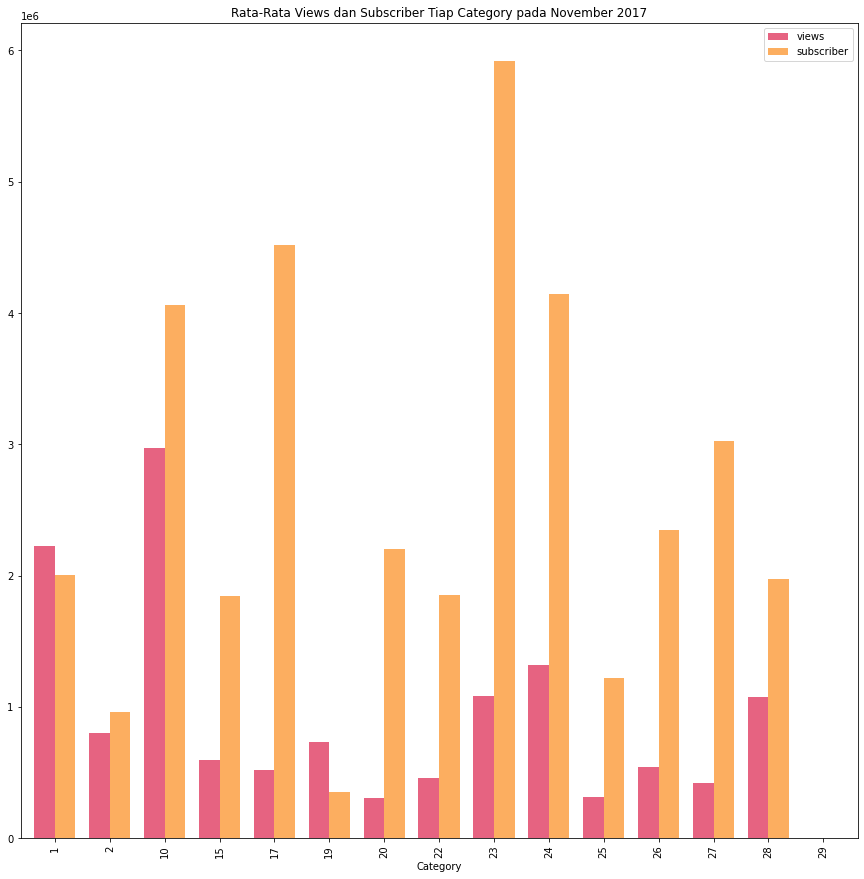

In [ ]:
datanov2017 = yt.loc[(yt["year"]==2017) & (yt["month"]==11)]          # Mencari data dengan kolom "publish_year" tahun 2017 dan bulan 11
df = datanov2017.groupby("category_id")["views","subscriber"].mean()  # Mencari nilai rata-rata kolom "views" dan "subscriber" 
                                                                      # untuk tiap kelompok data berbeda pada kolom "category_id"
# Membuat visualisasi
df = df.plot(kind="bar", figsize=(15,15), width= 0.75, color=["#E66381", "#FCAE60"], 
             title="Rata-Rata Views dan Subscriber Tiap Category pada November 2017")
df.set(xlabel="Category")
plt.show()

Perbesaran category 29

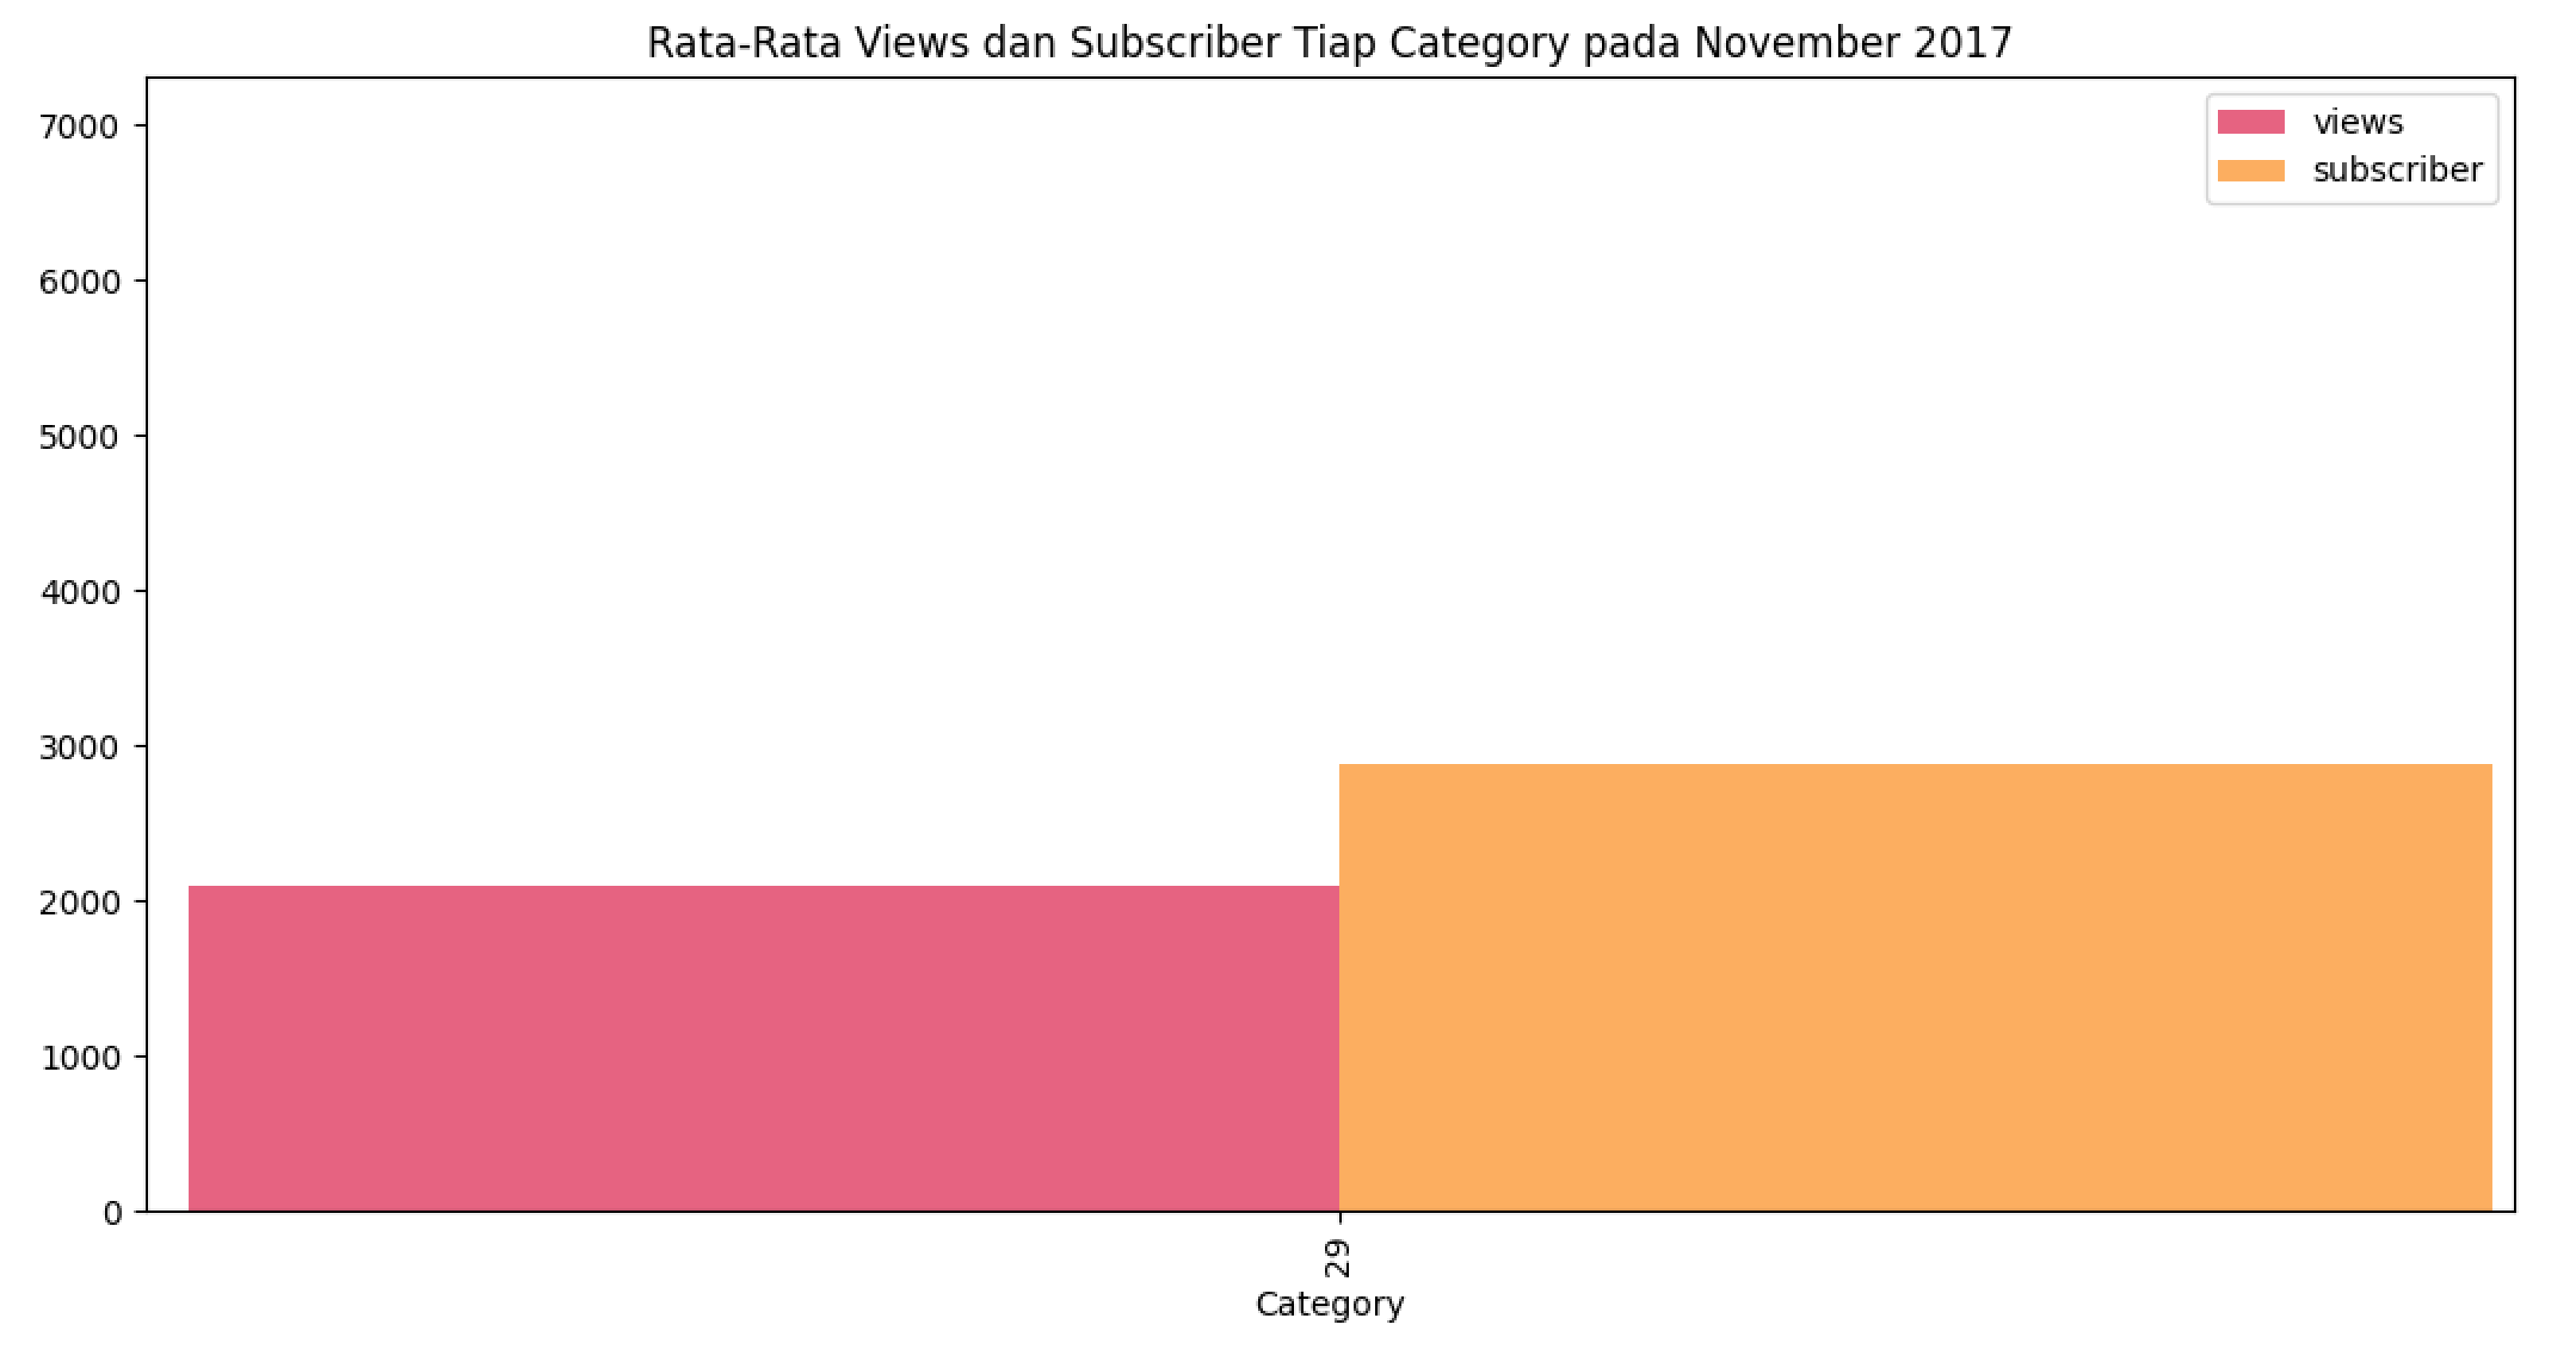

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


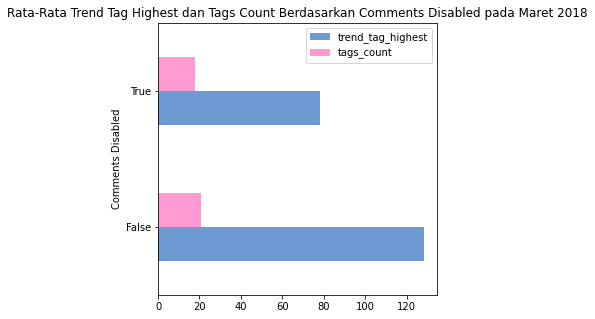

In [ ]:
# Membuat kolom baru "trendyear" dan "trendmonth" dengan data dari kolom "last_trending_date"
yt["trendyear"] = pd.DatetimeIndex(yt["last_trending_date"]).year       
yt["trendmonth"] = pd.DatetimeIndex(yt["last_trending_date"]).month

datamar2018 = yt.loc[(yt["trendyear"]==2018) & (yt["trendmonth"]==3)]   # Mencari data dengan kolom "last_trending_date" tahun 2018 dan bulan 3
df = datamar2018.groupby("comments_disabled")["trend_tag_highest", "tags_count"].mean()   # Mencari nilai rata-rata kolom "trend_tag_highest" dan "tags_count"
                                                                                          # untuk tiap kelompok data berbeda pada kolom "comments_disabled"
# Membuat visualisasi
df = df.plot(kind="barh", figsize=(5,5), width= 0.5, color=["#6E9AD3", "#FF9AD3"], 
             title="Rata-Rata Trend Tag Highest dan Tags Count Berdasarkan Comments Disabled pada Maret 2018")
df.set(ylabel="Comments Disabled")
plt.show()

### Penampilan Perubahan terhadap Waktu

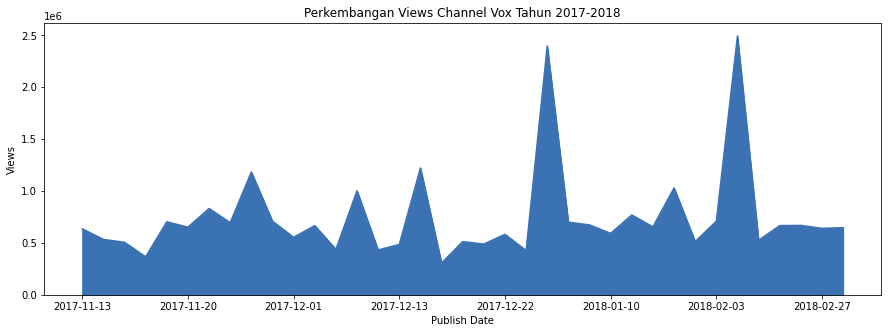

In [ ]:
ytVox = yt.loc[(yt["channel_title"]=="Vox") & ((yt["year"]==2017) | (yt["year"]==2018))]    # Mencari data dengan kolom "channel_title" berisi "Vox" 
                                                                                            # dan kolom "publish_year" tahun 2017 atau 2018
df = ytVox.groupby("publish_date")["views"].mean()  # Mencari nilai rata-rata kolom "views" untuk tiap kelompok data berbeda pada kolom "publish_date"

# Membuat visualisasi
df = df.plot(kind="area", figsize=(15,5), color="#3A72B3", title="Perkembangan Views Channel Vox Tahun 2017-2018")
df.set(xlabel="Publish Date", ylabel="Views")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


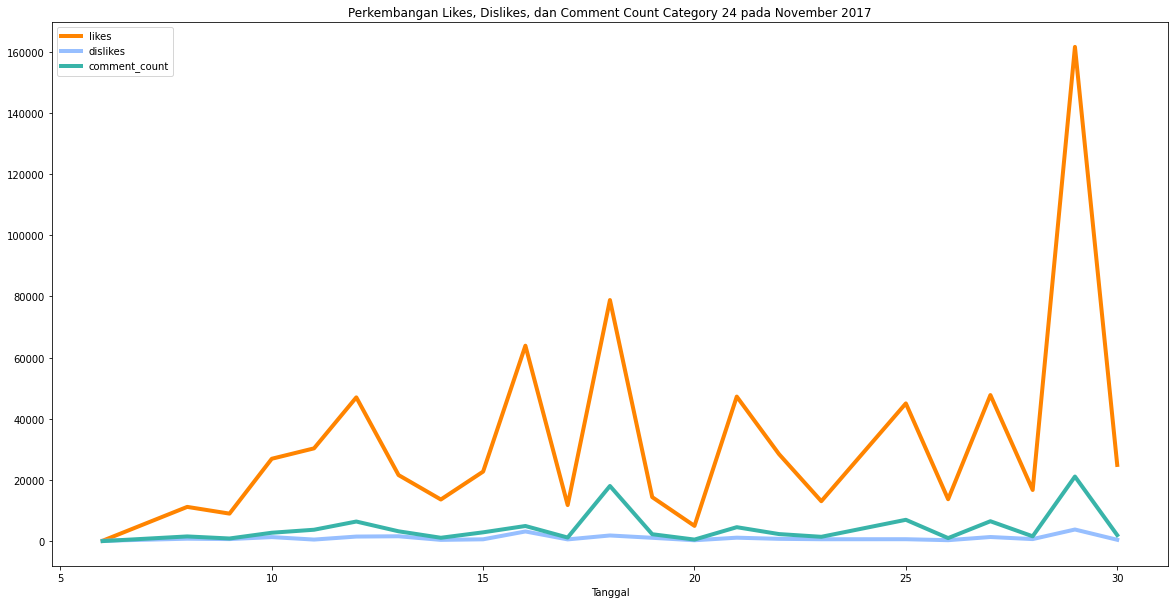

In [ ]:
datanov2017 = yt.loc[(yt["category_id"]==24) & (yt["year"]==2017) & (yt["month"]==11)]  # Mencari data dengan kolom "category_id" berisi 24 
                                                                                        # dan kolom "publish_date" tahun 2017 dan bulan 11
datanov2017["day"] = pd.DatetimeIndex(datanov2017["publish_date"]).day          # Membuat kolom baru "day" berisi data tanggal dari kolom "publish_date" pada datanov2017
df = datanov2017.groupby(["day"])["likes", "dislikes", "comment_count"].mean()  # Mencari nilai rata-rata kolom "likes", "dislikes", dan "comment_count"
                                                                                # untuk tiap kelompok data berbeda pada kolom baru "day"
# Membuat visualisasi
df = df.plot(kind="line", figsize=(20,10), color=["#ff8400", "#97BFFF", "#39B4A9"], linewidth=4, 
             title="Perkembangan Likes, Dislikes, dan Comment Count Category 24 pada November 2017")
df.set(xlabel="Tanggal")
plt.show()

Perbesaran perkembangan dislikes

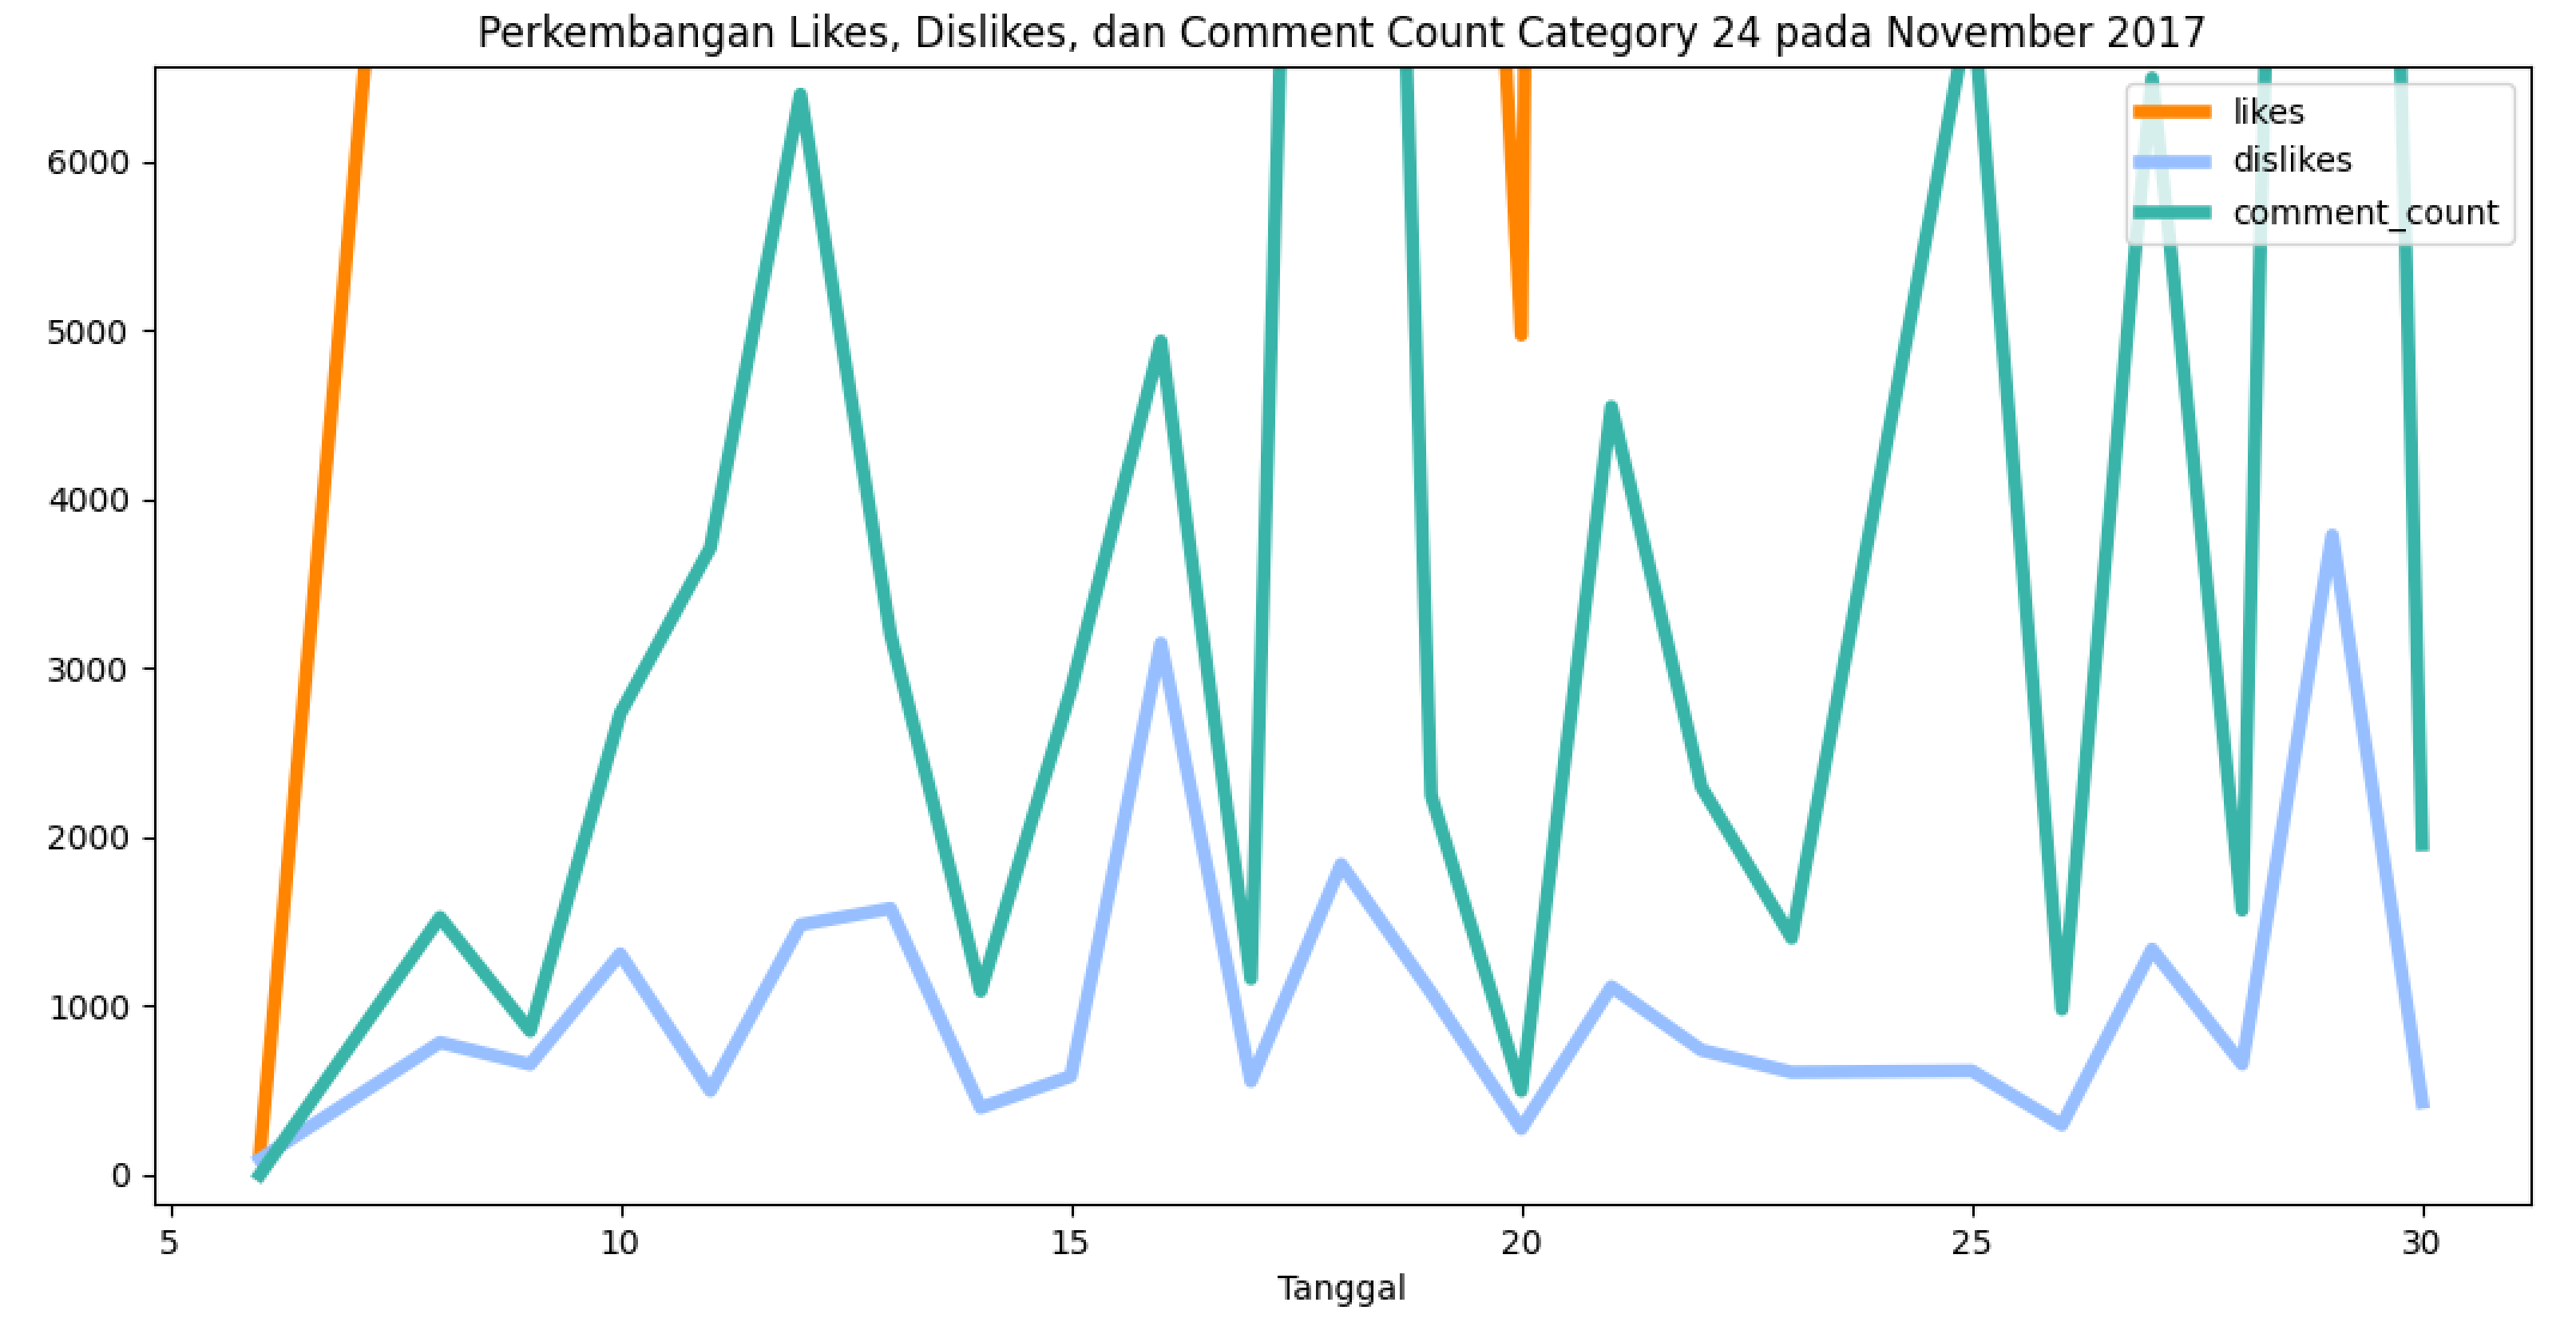

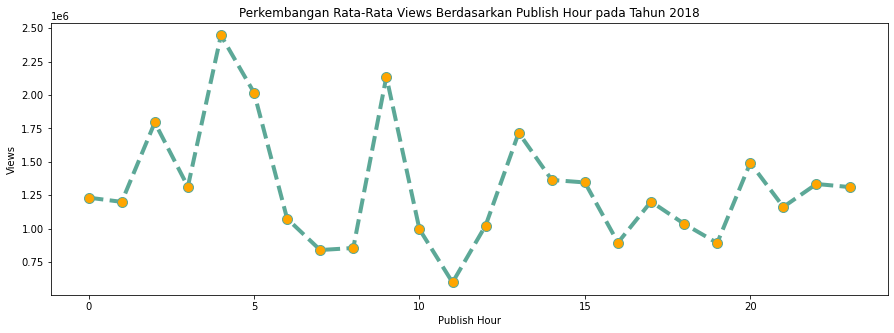

In [ ]:
data2018 = yt.loc[(yt["year"]==2018)]                     # Mencari data dengan kolom "publish_year" tahun 2018
df = data2018.groupby(["publish_hour"])["views"].mean()   # Mencari nilai rata-rata kolom "views" 
                                                          # untuk tiap kelompok data berbeda pada kolom "publish_hour"

# Membuat visualisasi
df = df.plot(kind="line", figsize=(15,5), color="#5CA897", linewidth=4, linestyle="--", marker="o", markersize=10, 
             markerfacecolor="orange", title="Perkembangan Rata-Rata Views Berdasarkan Publish Hour pada Tahun 2018")
df.set(xlabel="Publish Hour", ylabel="Views")
plt.show()

### Penampilan Hierarki dan Hubungan Keseluruhan-Bagian

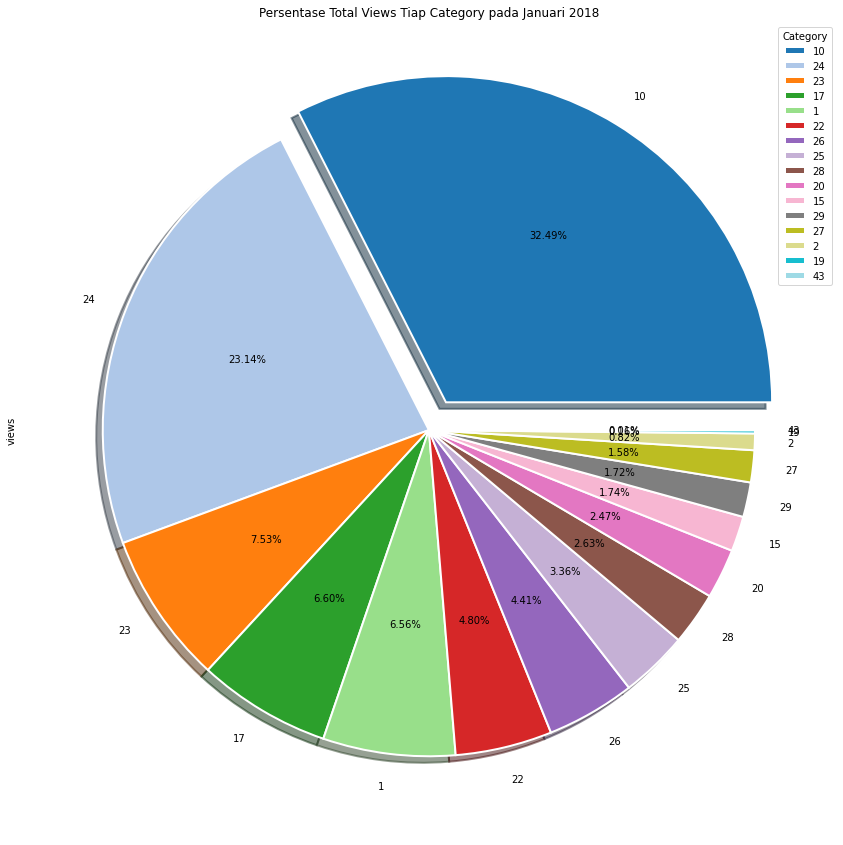

In [ ]:
datajan2018 = yt.loc[(yt["year"]==2018) & (yt["month"]==1)]   # Mencari data dengan kolom "publish_year" tahun 2018 dan bulan 1
df = datajan2018.groupby(["category_id"])["views"].sum().sort_values(ascending=False)   # Mencari total nilai kolom "views" 
                                                                                        # untuk tiap kelompok data berbeda pada kolom "category_id"
                                                                                        # dan mengurutkan "category_id" dari total "views" yang terbesar 
# Membuat visualisasi
border = {"edgecolor": "white", "linewidth": 2, "antialiased": True}    # Membuat border pada pie chart agar lebih mudah dilihat
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)            # Membuat highlight data penting pada pie chart seperti nilai terbesar
df.plot(kind="pie", figsize=(15,15), autopct='%1.2f%%', explode=explode, wedgeprops=border, colormap="tab20",
        shadow=True, title="Persentase Total Views Tiap Category pada Januari 2018")
plt.legend(title= 'Category')
plt.show()

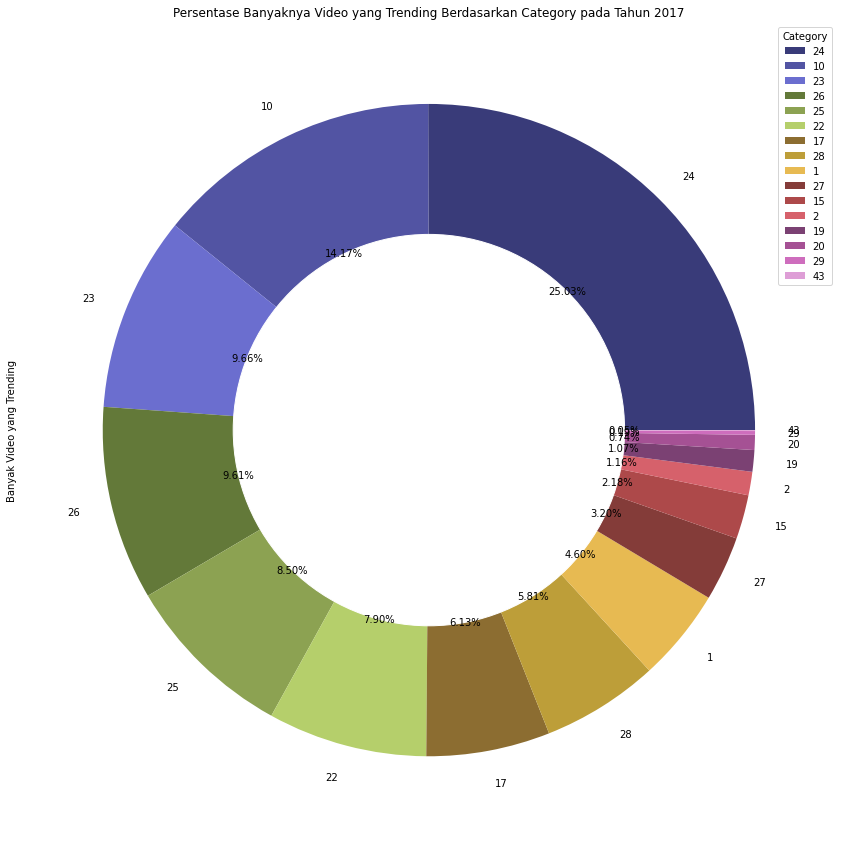

In [ ]:
data2017 = yt.loc[(yt["year"]==2017)]         # Mencari data dengan kolom "publish_year" tahun 2017
df = data2017["category_id"].value_counts()   # Menghitung distribusi frekuensi kolom "category_id" 

# Membuat visualisasi
df = df.plot(kind="pie", figsize=(15,15), autopct='%1.2f%%', colormap="tab20b", 
             title="Persentase Banyaknya Video yang Trending Berdasarkan Category pada Tahun 2017")
df.set(ylabel="Banyak Video yang Trending")
plt.rcParams['text.color'] = 'black'
circle = plt.Circle((0,0), 0.6, color="white")    # Membuat lingkaran berwarna putih di tengah pie chart
graph = plt.gcf()
graph.gca().add_artist(circle)
plt.legend(title="Category")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


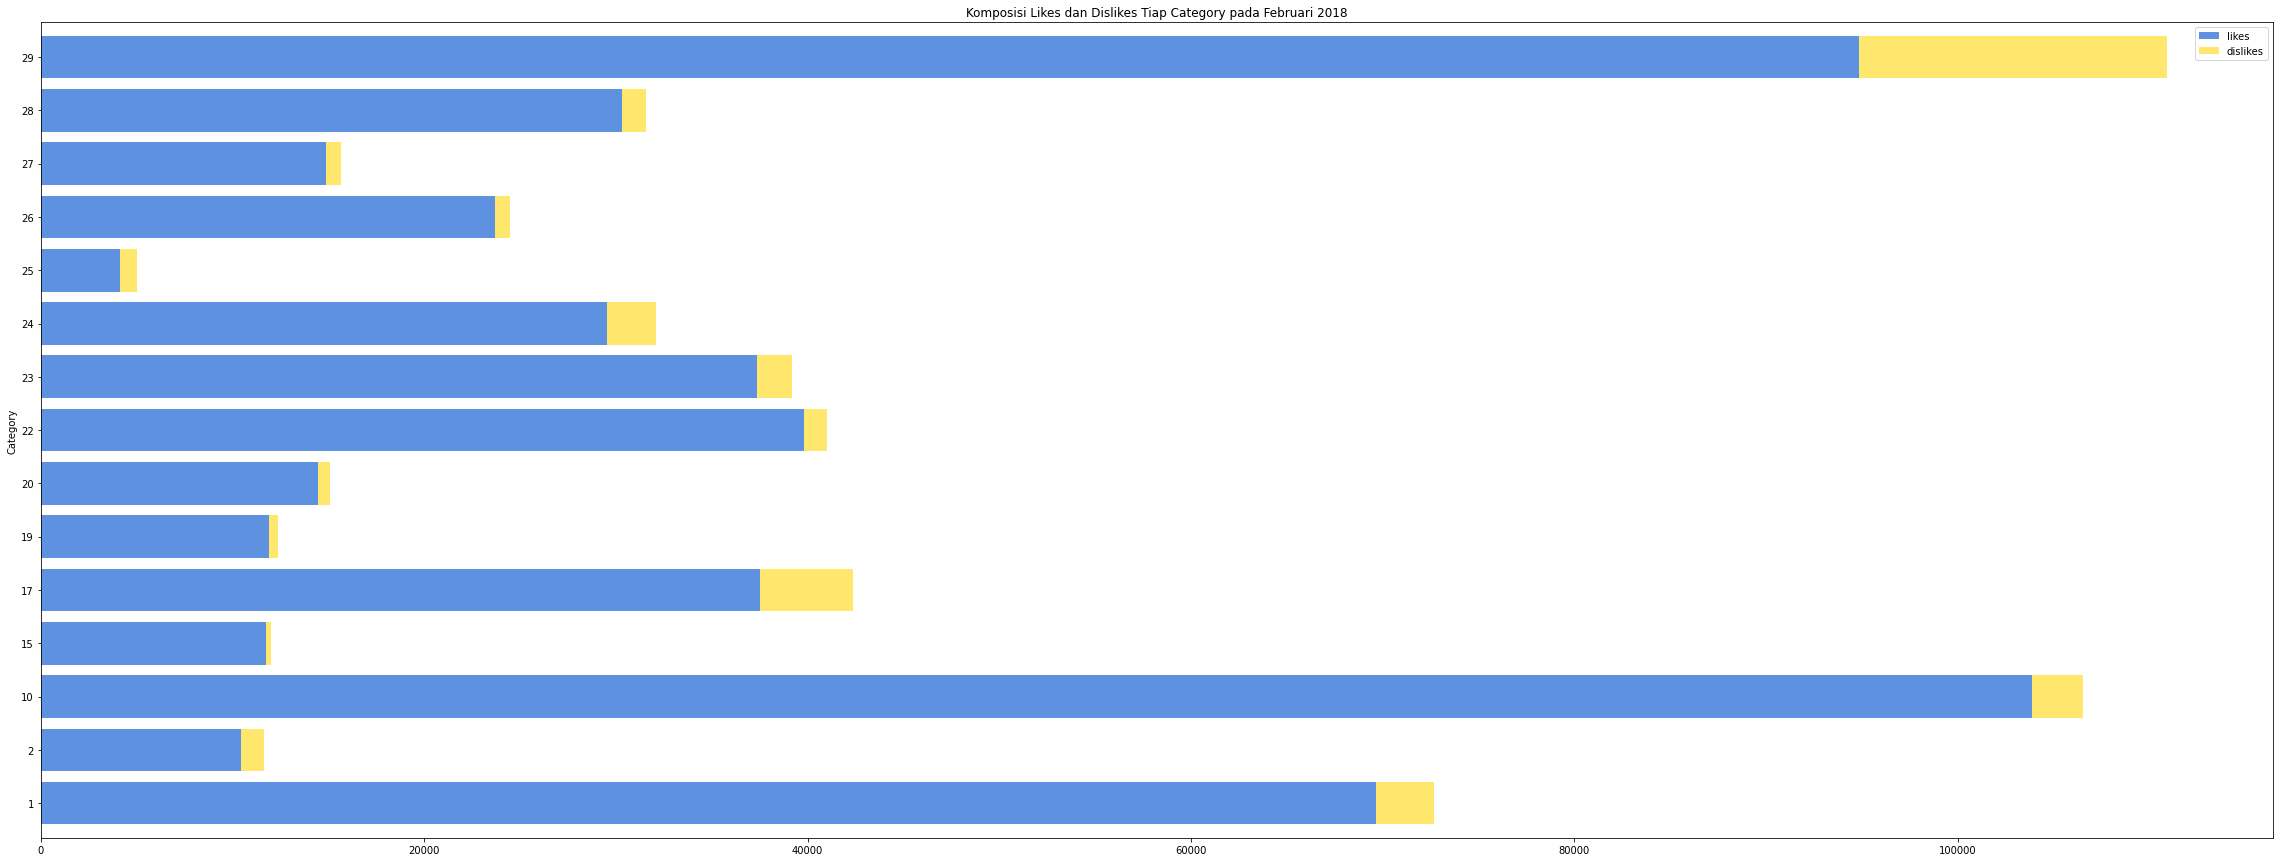

In [ ]:
datafeb2018 = yt.loc[(yt["year"]==2018) & (yt["month"]==2)]             # Mencari data dengan kolom "publish_year" tahun 2018 dan bulan 2
df = datafeb2018.groupby(["category_id"])["likes", "dislikes"].mean()   # Mencari nilai rata-rata kolom "likes" dan "dislikes" 
                                                                        # untuk tiap kelompok data berbeda pada kolom "category_id"
# Membuat visualisasi
df = df.plot(kind="barh", figsize=(40,15), width=0.8, color=["#5E92E0", "#FFE66D"], 
             title="Komposisi Likes dan Dislikes Tiap Category pada Februari 2018", stacked=True)
df.set(ylabel="Category")
plt.show()

### Plotting Relationships

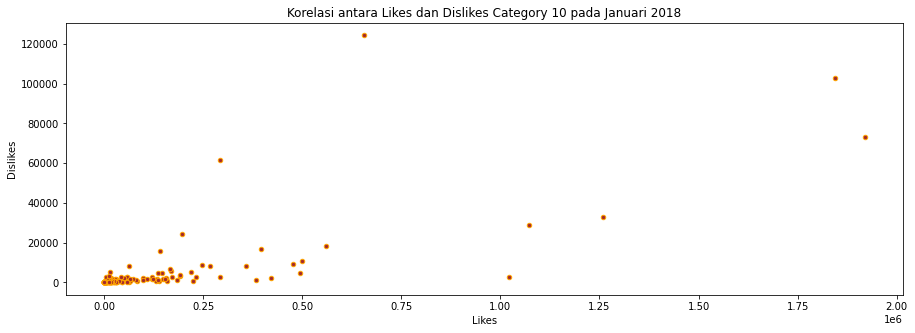

In [ ]:
yt10 = yt.loc[(yt["year"]==2018) & (yt["month"]==1) & (yt["category_id"]==10)]    # Mencari data dengan kolom "publish_year" tahun 2018 dan bulan 1
                                                                                  # dan kolom "category_id" berisi 10
# Membuat visualisasi
df = yt10.plot(kind="scatter", x="likes", y="dislikes", color="brown", edgecolor="orange", figsize=(15,5), 
                 title="Korelasi antara Likes dan Dislikes Category 10 pada Januari 2018")
df.set(xlabel="Likes", ylabel="Dislikes")
plt.show()

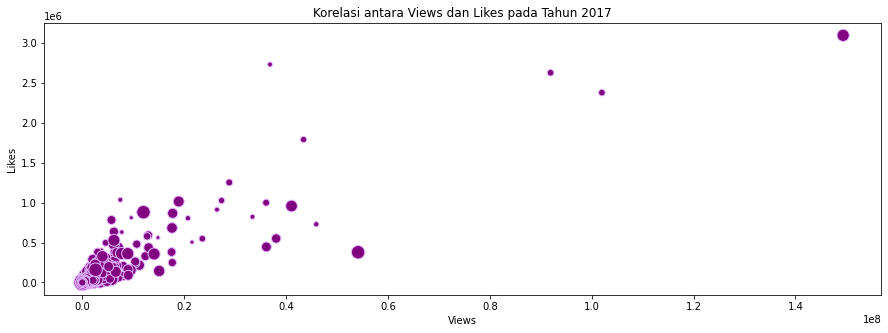

In [ ]:
data2017 = yt.loc[(yt["year"]==2017)]   # Mencari data dengan kolom "publish_year" tahun 2017

# Membuat visualisasi
df = data2017.plot(kind="scatter", x="views", y="likes", sizes=4*(data2017["tags_count"]), color="purple", 
                   edgecolor="#E2B8FF", figsize=(15,5), title="Korelasi antara Views dan Likes pada Tahun 2017")
df.set(xlabel="Views", ylabel="Likes")
plt.show()

# Korelasi

In [ ]:
#menemukan coorelation coefecient
yt_now.corr()

,views,likes,dislikes,comment_count,tag_appeared_in_title_count,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
views,1.000000,0.820951,0.528939,0.573385,0.024586,0.190477,-0.029170,-0.013075,-0.021857,0.009490,0.265718
likes,0.820951,1.000000,0.460294,0.712927,0.028875,0.165076,-0.030236,-0.010162,-0.033524,0.000155,0.320504
dislikes,0.528939,0.460294,1.000000,0.833591,-0.011708,0.048368,-0.007770,0.019277,0.001761,0.015123,0.129718
comment_count,0.573385,0.712927,0.833591,1.000000,-0.011338,0.084763,-0.017414,0.008993,-0.012426,0.008716,0.191212
tag_appeared_in_title_count,0.024586,0.028875,-0.011708,-0.011338,1.000000,-0.007517,-0.017186,0.177373,0.184761,0.452213,0.146813
trend_day_count,0.190477,0.165076,0.048368,0.084763,-0.007517,1.000000,-0.060814,-0.089643,-0.170191,-0.054108,-0.022432
trend.publish.diff,-0.029170,-0.030236,-0.007770,-0.017414,-0.017186,-0.060814,1.000000,-0.061616,-0.061611,-0.084062,-0.075939
trend_tag_highest,-0.013075,-0.010162,0.019277,0.008993,0.177373,-0.089643,-0.061616,1.000000,0.829698,0.450280,0.262213
trend_tag_total,-0.021857,-0.033524,0.001761,-0.012426,0.184761,-0.170191,-0.061611,0.829698,1.000000,0.540879,0.325826
tags_count,0.009490,0.000155,0.015123,0.008716,0.452213,-0.054108,-0.084062,0.450280,0.540879,1.000000,0.248709


# Visualiasi korelasi

0.8209508219452931


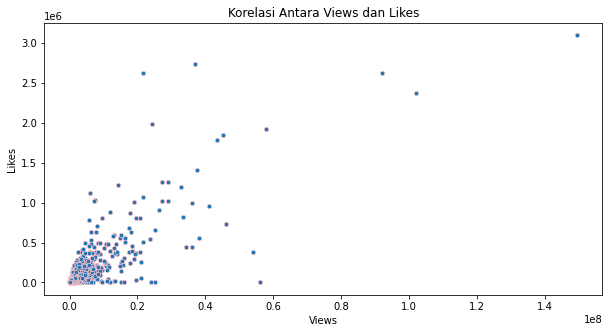

In [ ]:
# Views - Likes
print(yt["views"].corr(yt["likes"]))
yt.plot(kind="scatter", x="views", y="likes", edgecolor="pink", linewidth=0.7, figsize=(10,5), 
        title="Korelasi Antara Views dan Likes").set(xlabel="Views", ylabel="Likes")
plt.show()

0.528938803346496


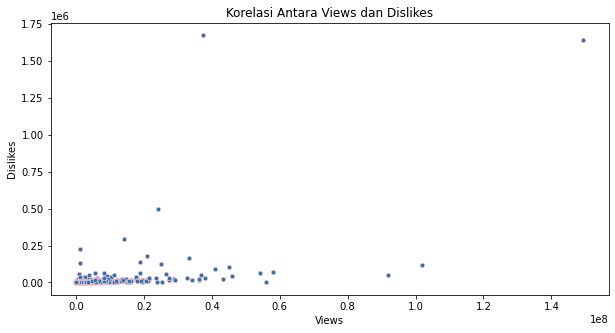

In [ ]:
# Views - Dislikes
print(yt["views"].corr(yt["dislikes"]))
yt.plot(kind="scatter", x="views", y="dislikes", edgecolor="pink", linewidth=0.7, figsize=(10,5), 
        title="Korelasi Antara Views dan Dislikes").set(xlabel="Views", ylabel="Dislikes")
plt.show()

0.5733847528912057


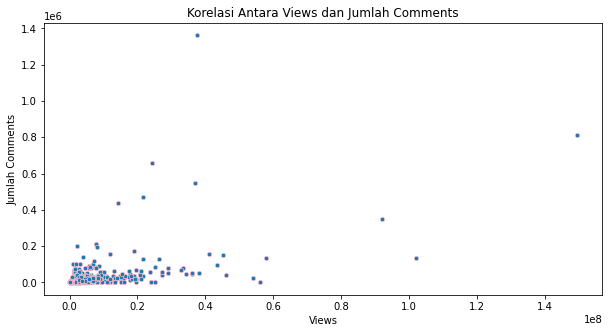

In [ ]:
# Views - Comment_count
print(yt["views"].corr(yt["comment_count"]))
yt.plot(kind="scatter", x="views", y="comment_count", edgecolor="pink", linewidth=0.7, figsize=(10,5), 
        title="Korelasi Antara Views dan Jumlah Comments").set(xlabel="Views", ylabel="Jumlah Comments")
plt.show()

0.02458608127124357


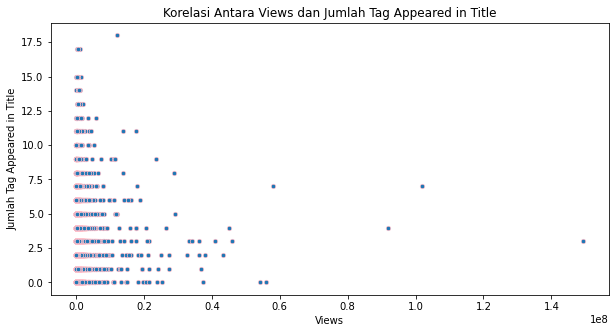

In [ ]:
# Views - tag_appeared_in_title_count
print(yt["views"].corr(yt["tag_appeared_in_title_count"]))
yt.plot(kind="scatter", x="views", y="tag_appeared_in_title_count", edgecolor="pink", linewidth=0.7, figsize=(10,5), 
        title="Korelasi Antara Views dan Jumlah Tag Appeared in Title").set(xlabel="Views", ylabel="Jumlah Tag Appeared in Title")
plt.show()

0.1904766183596002


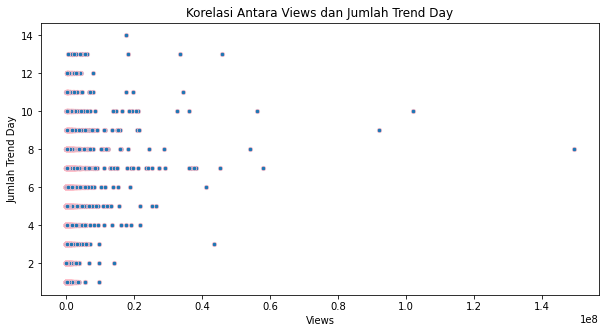

In [ ]:
# Views - trend_day_count
print(yt["views"].corr(yt["trend_day_count"]))
yt.plot(kind="scatter", x="views", y="trend_day_count", edgecolor="pink", linewidth=0.7, figsize=(10,5), 
        title="Korelasi Antara Views dan Jumlah Trend Day").set(xlabel="Views", ylabel="Jumlah Trend Day")
plt.show()

-0.02916961117246368


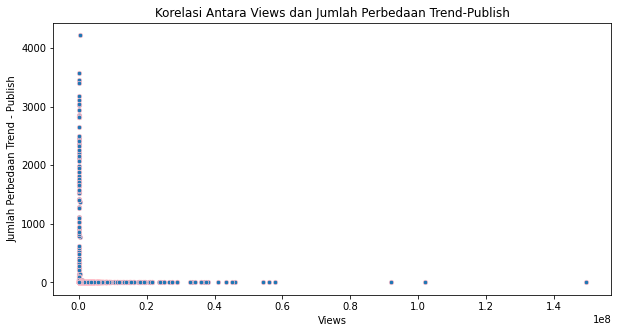

In [ ]:
# Views - trend.publish.diff
print(yt_now["views"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x="views", y="trend.publish.diff", edgecolor="pink", linewidth=0.7, figsize=(10,5),
        title="Korelasi Antara Views dan Jumlah Perbedaan Trend-Publish").set(xlabel="Views", ylabel="Jumlah Perbedaan Trend - Publish")
plt.show()

-0.013074637947380341


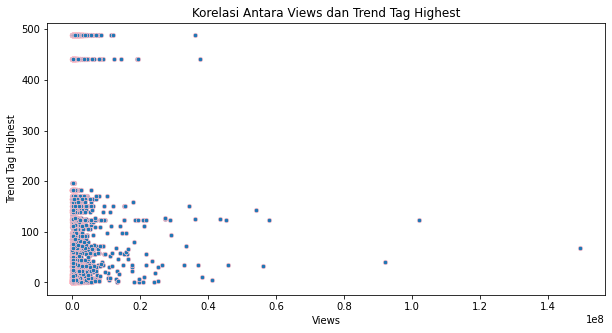

In [ ]:
# Views - trend_tag_highest
print(yt["views"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x="views", y="trend_tag_highest", edgecolor="pink", linewidth=0.7, figsize=(10,5), 
        title="Korelasi Antara Views dan Trend Tag Highest").set(xlabel="Views", ylabel="Trend Tag Highest")
plt.show()

-0.021856870376722088


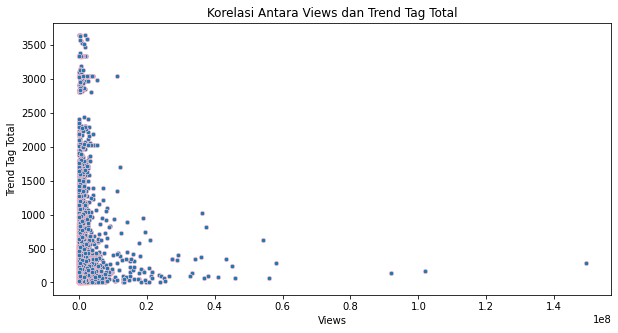

In [ ]:
# Views - trend_tag_total
print(yt["views"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x="views", y="trend_tag_total", edgecolor="pink", linewidth=0.7, figsize=(10,5), 
        title="Korelasi Antara Views dan Trend Tag Total").set(xlabel="Views", ylabel="Trend Tag Total")
plt.show()

0.009489903962272778


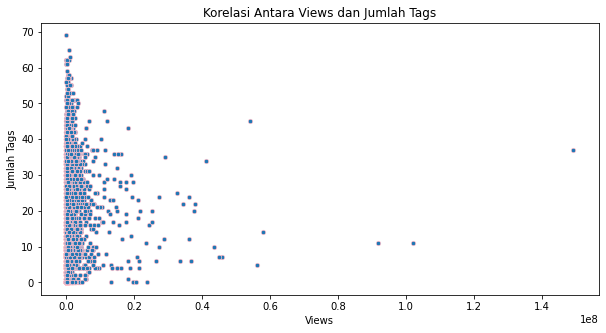

In [ ]:
# Views - tags_count
print(yt["views"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x="views", y="tags_count", edgecolor="pink", linewidth=0.7, figsize=(10,5), 
        title="Korelasi Antara Views dan Jumlah Tags").set(xlabel="Views", ylabel="Jumlah Tags")
plt.show()

0.2656739391637472


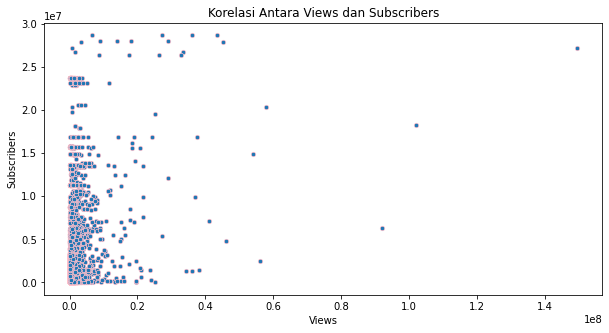

In [ ]:
# Views – subscriber
print(yt["views"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x="views", y="subscriber", edgecolor="pink", linewidth=0.7, figsize=(10,5), 
        title="Korelasi Antara Views dan Subscribers").set(xlabel="Views", ylabel="Subscribers")
plt.show()

0.460294220163892


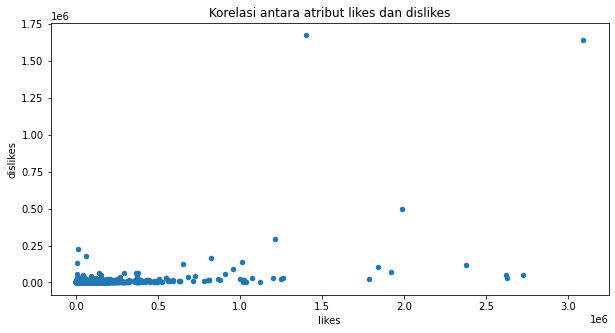

In [ ]:
#Likes - Dislikes
print(yt["likes"].corr(yt["dislikes"]))
yt.plot(kind="scatter", x="likes", y="dislikes", title="Korelasi antara atribut likes dan dislikes", figsize=(10,5))
plt.show()

0.7129272157238951


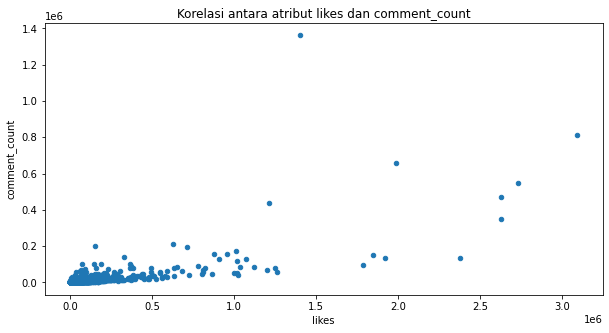

In [ ]:
#Likes - comment_count
print(yt["likes"].corr(yt["comment_count"]))
yt.plot(kind="scatter", x = "likes", y = "comment_count", title="Korelasi antara atribut likes dan comment_count", figsize=(10,5))
plt.show()

0.02887524333461213


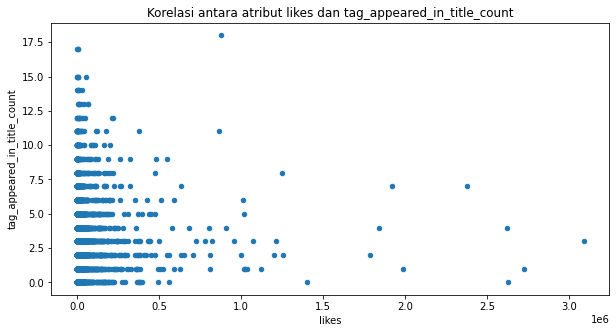

In [ ]:
#Likes - tag_appeared_in_title_count
print(yt["likes"].corr(yt["tag_appeared_in_title_count"]))
yt.plot(kind="scatter", x = "likes", y = "tag_appeared_in_title_count", title="Korelasi antara atribut likes dan tag_appeared_in_title_count", figsize=(10,5))
plt.show()

0.16507587487322767


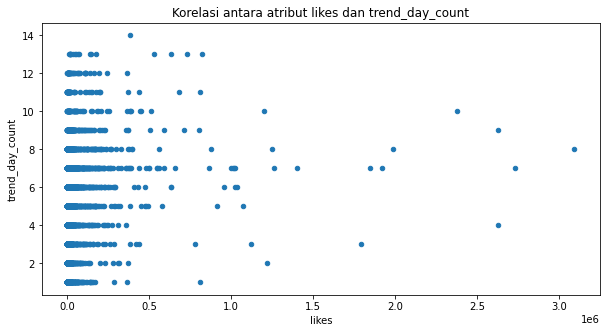

In [ ]:
#Likes - trend_day_count
print(yt["likes"].corr(yt["trend_day_count"]))
yt.plot(kind="scatter", x = "likes", y = "trend_day_count", title="Korelasi antara atribut likes dan trend_day_count", figsize=(10,5))
plt.show()

-0.030236396603123033


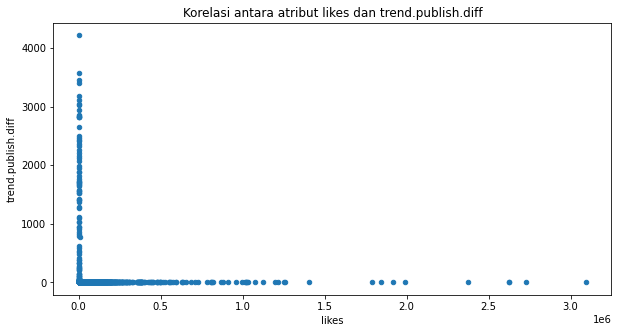

In [ ]:
#Likes - trend.publish.diff
print(yt["likes"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x = "likes", y = "trend.publish.diff", title="Korelasi antara atribut likes dan trend.publish.diff", figsize=(10,5))
plt.show()

-0.010161861356980892


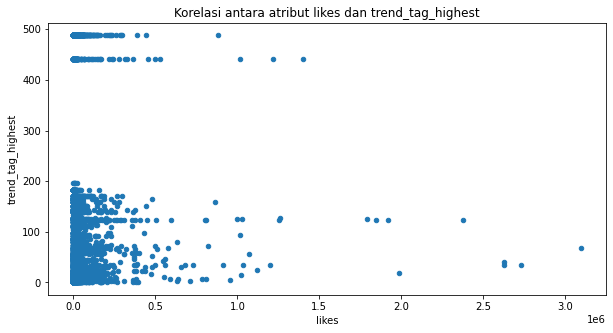

In [ ]:
#Likes - trend_tag_highest
print(yt["likes"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "likes", y = "trend_tag_highest", title="Korelasi antara atribut likes dan trend_tag_highest", figsize=(10,5))
plt.show()

-0.03352366007455522


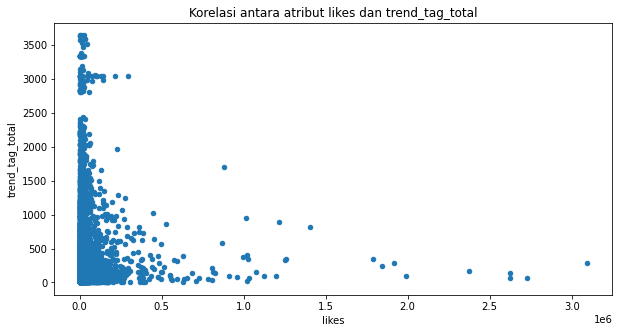

In [ ]:
#Likes - trend_tag_total
print(yt["likes"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "likes", y = "trend_tag_total", title="Korelasi antara atribut likes dan trend_tag_total", figsize=(10,5))
plt.show()

0.00015514245964619368


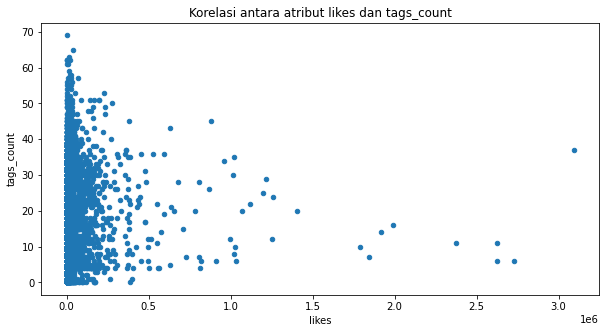

In [ ]:
#Likes - tags_count
print(yt["likes"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "likes", y = "tags_count", title="Korelasi antara atribut likes dan tags_count", figsize=(10,5))
plt.show()

0.32045089547964173


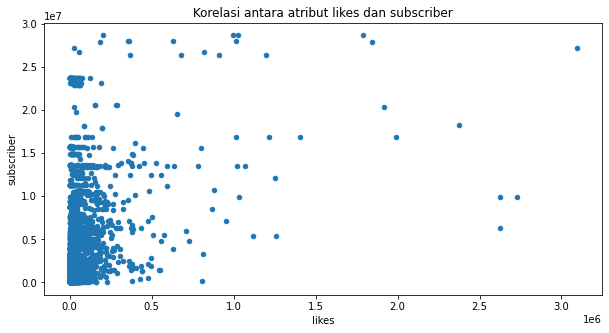

In [ ]:
#Likes - subcriber
print(yt["likes"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "likes", y = "subscriber", title="Korelasi antara atribut likes dan subscriber", figsize=(10,5))
plt.show()

0.8335906958211329


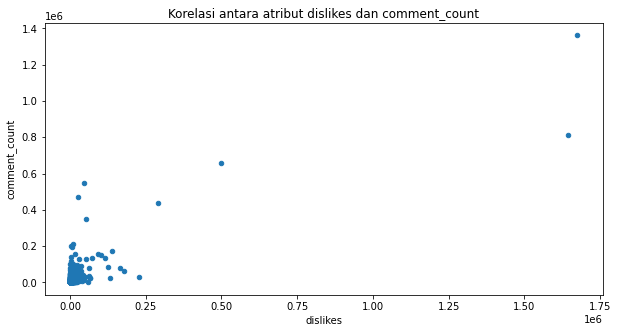

In [ ]:
#Dislikes - comment_count
print(yt["dislikes"].corr(yt["comment_count"]))
yt.plot(kind="scatter", x = "dislikes", y = "comment_count", title="Korelasi antara atribut dislikes dan comment_count", figsize=(10,5))
plt.show()

-0.011707670488627303


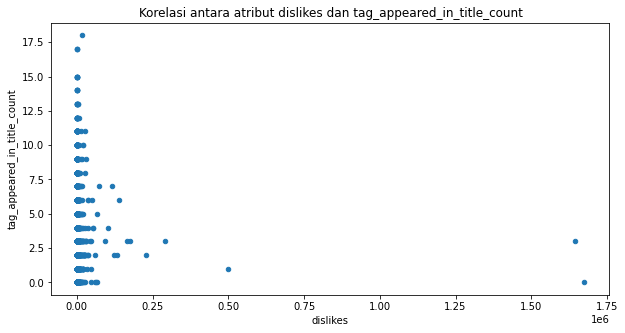

In [ ]:
#Dislikes - tag_appeared_in_title_count
print(yt["dislikes"].corr(yt["tag_appeared_in_title_count"]))
yt.plot(kind="scatter", x = "dislikes", y = "tag_appeared_in_title_count", title="Korelasi antara atribut dislikes dan tag_appeared_in_title_count", figsize=(10,5))
plt.show()

0.04836780504905265


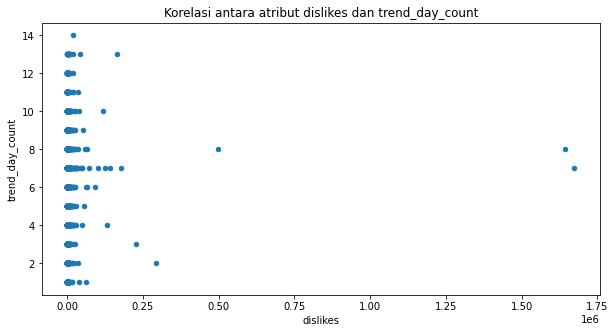

In [ ]:
#Dislikes - trend_day_count
print(yt["dislikes"].corr(yt["trend_day_count"]))
yt.plot(kind="scatter", x = "dislikes", y = "trend_day_count", title="Korelasi antara atribut dislikes dan trend_day_count", figsize=(10,5))
plt.show()

-0.007770347901677333


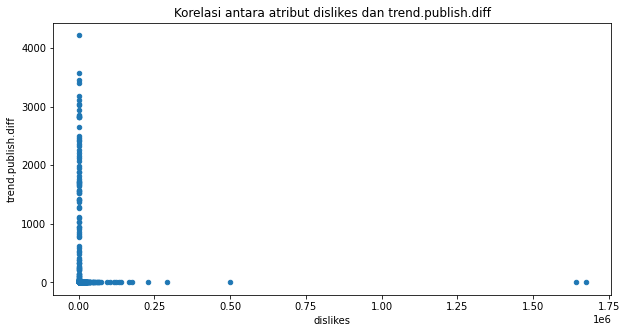

In [ ]:
#Dislikes - trend.publish.diff
print(yt["dislikes"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x = "dislikes", y = "trend.publish.diff", title="Korelasi antara atribut dislikes dan trend.publish.diff", figsize=(10,5))
plt.show()

0.019277279062212493


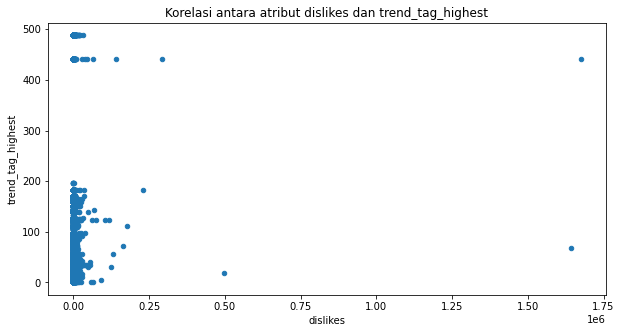

In [ ]:
#Dislikes - trend_tag_highest
print(yt["dislikes"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "dislikes", y = "trend_tag_highest", title="Korelasi antara atribut dislikes dan trend_tag_highest", figsize=(10,5))
plt.show()

0.0017613003871175805


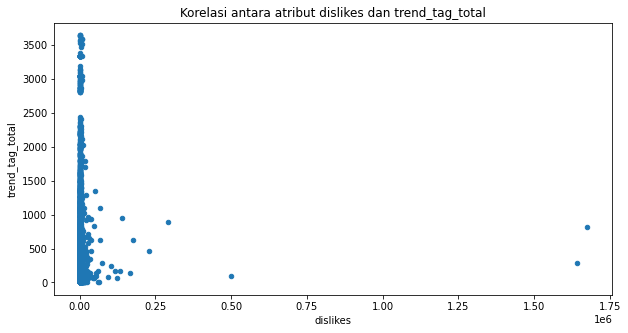

In [ ]:
#Dislikes - trend_tag_total
print(yt["dislikes"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "dislikes", y = "trend_tag_total", title="Korelasi antara atribut dislikes dan trend_tag_total", figsize=(10,5))
plt.show()

0.015123274085789631


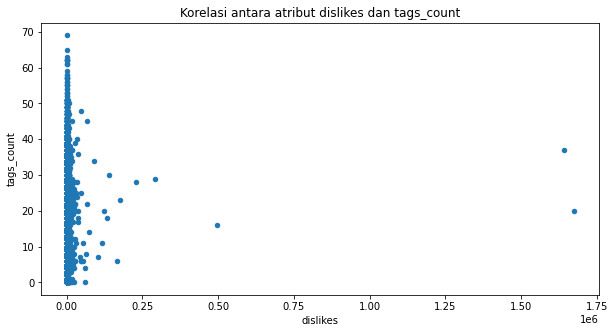

In [ ]:
#Dislikes - tags_count
print(yt["dislikes"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "dislikes", y = "tags_count", title="Korelasi antara atribut dislikes dan tags_count", figsize=(10,5))
plt.show()

0.1297173266868582


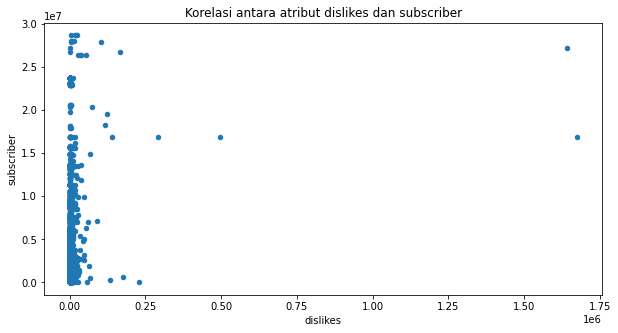

In [ ]:
#Dislikes - subscriber
print(yt["dislikes"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "dislikes", y = "subscriber", title="Korelasi antara atribut dislikes dan subscriber", figsize=(10,5))
plt.show()

-0.011337660131507025


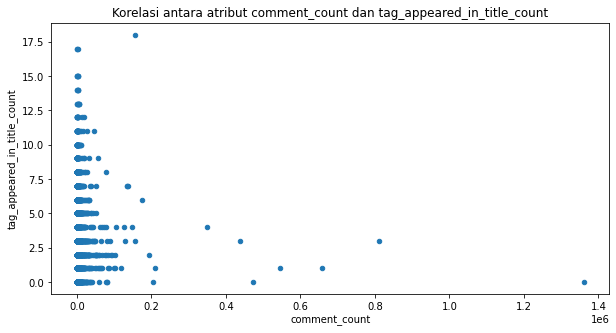

In [ ]:
#Comment_count - tag_appeared_in_title_count
print(yt["comment_count"].corr(yt["tag_appeared_in_title_count"]))
yt.plot(kind="scatter", x = "comment_count", y = "tag_appeared_in_title_count", title="Korelasi antara atribut comment_count dan tag_appeared_in_title_count", figsize=(10,5))
plt.show()

0.08476341102740191


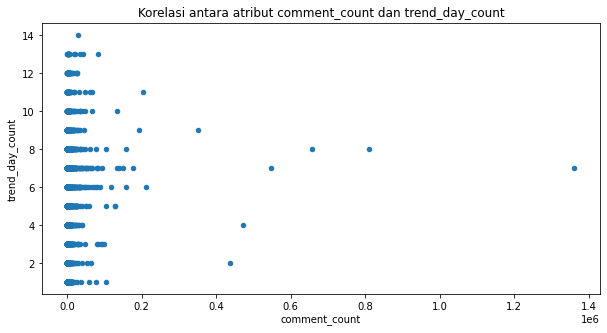

In [ ]:
#Comment_count - trend_day_count
print(yt["comment_count"].corr(yt["trend_day_count"]))
yt.plot(kind="scatter", x = "comment_count", y = "trend_day_count", title="Korelasi antara atribut comment_count dan trend_day_count", figsize=(10,5))
plt.show()

-0.017414134328996498


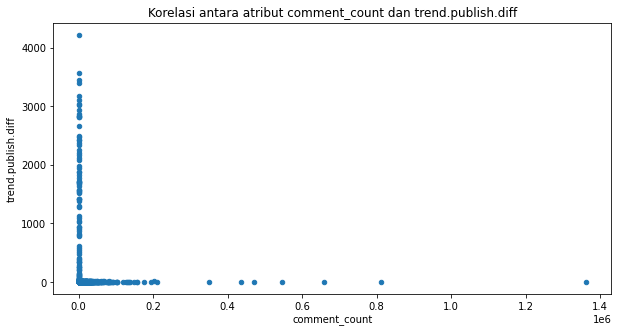

In [ ]:
#Comment_count - trend.publish.diff
print(yt["comment_count"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x = "comment_count", y = "trend.publish.diff", title="Korelasi antara atribut comment_count dan trend.publish.diff", figsize=(10,5))
plt.show()

0.008992628047822939


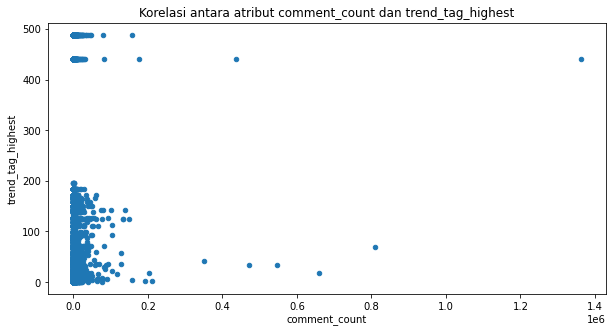

In [ ]:
#Comment_count - trend_tag_highest
print(yt["comment_count"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "comment_count", y = "trend_tag_highest", title="Korelasi antara atribut comment_count dan trend_tag_highest", figsize=(10,5))
plt.show()

-0.012425939379166232


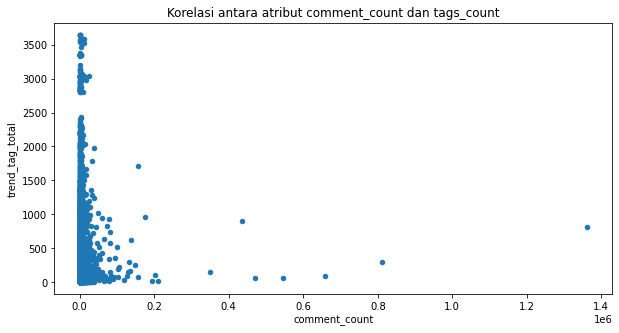

In [ ]:
#Comment_count - trend_tag_total
print(yt["comment_count"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "comment_count", y = "trend_tag_total", title="Korelasi antara atribut comment_count dan tags_count", figsize=(10,5))
plt.show()

0.00871642194976111


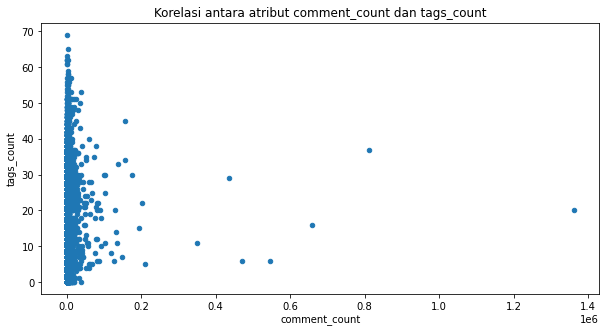

In [ ]:
#Comment_count - tags_count
print(yt["comment_count"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "comment_count", y = "tags_count", title="Korelasi antara atribut comment_count dan tags_count", figsize=(10,5))
plt.show()

0.19120251681918987


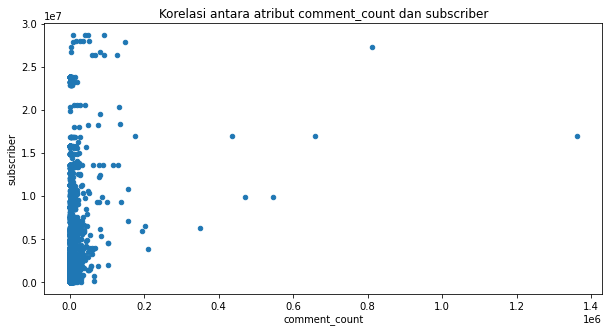

In [ ]:
#Comment_count - subscriber
print(yt["comment_count"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "comment_count", y = "subscriber", title="Korelasi antara atribut comment_count dan subscriber", figsize=(10,5))
plt.show()

-0.0075165728711719835


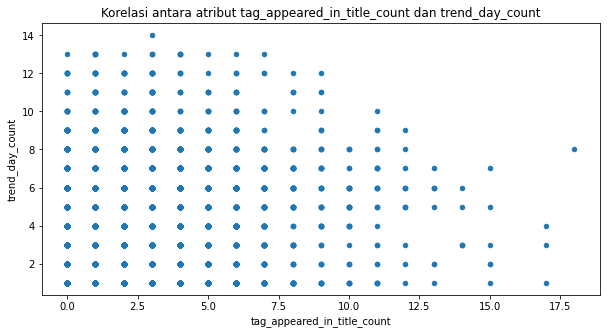

In [ ]:
#tag_appeared_in_title_count - trend_day_count
print(yt["tag_appeared_in_title_count"].corr(yt["trend_day_count"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "trend_day_count", title="Korelasi antara atribut tag_appeared_in_title_count dan trend_day_count", figsize=(10,5))
plt.show()

-0.017186215728311492


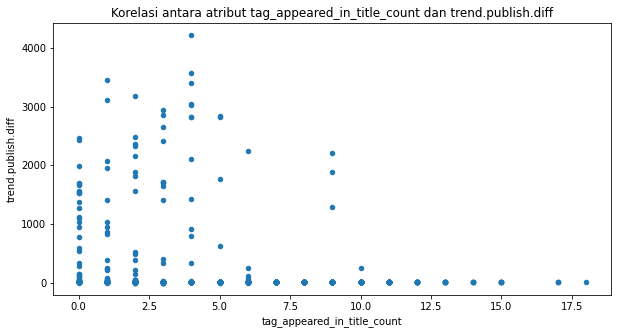

In [ ]:
#tag_appeared_in_title_count - trend.publish.diff
print(yt["tag_appeared_in_title_count"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "trend.publish.diff", title="Korelasi antara atribut tag_appeared_in_title_count dan trend.publish.diff", figsize=(10,5))
plt.show()

0.17737304961729003


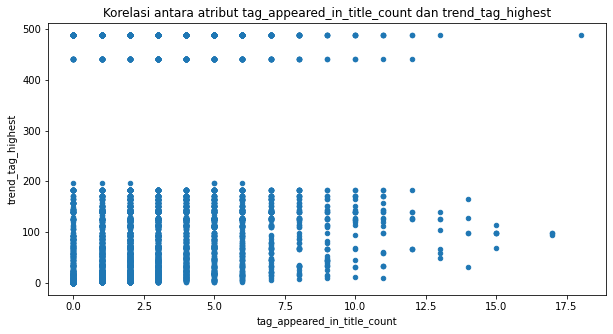

In [ ]:
#tag_appeared_in_title_count - trend_tag_highest
print(yt["tag_appeared_in_title_count"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "trend_tag_highest", title="Korelasi antara atribut tag_appeared_in_title_count dan trend_tag_highest", figsize=(10,5))
plt.show()

0.18476088332405455


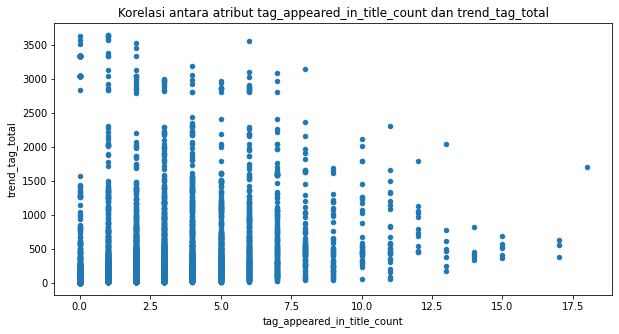

In [ ]:
#tag_appeared_in_title_count - trend_tag_total
print(yt["tag_appeared_in_title_count"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "trend_tag_total", title="Korelasi antara atribut tag_appeared_in_title_count dan trend_tag_total", figsize=(10,5))
plt.show()

0.45221259877450876


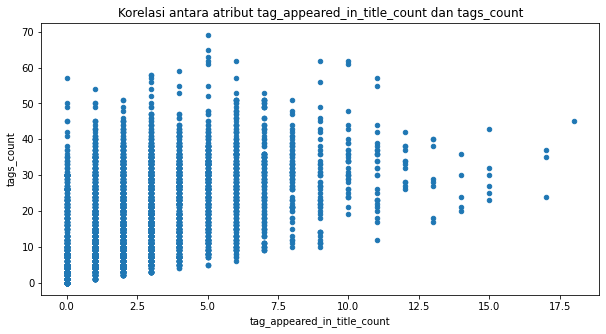

In [ ]:
#tag_appeared_in_title_count - tags_count
print(yt["tag_appeared_in_title_count"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "tags_count", title="Korelasi antara atribut tag_appeared_in_title_count dan tags_count", figsize=(10,5))
plt.show()

0.14636952477511622


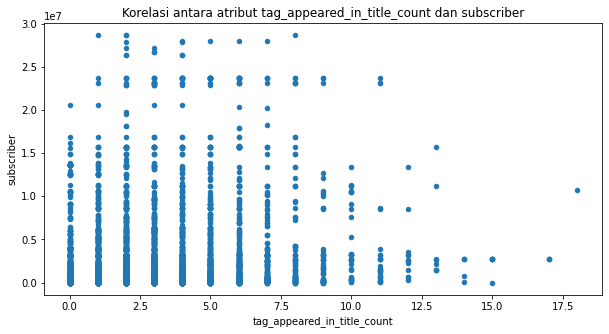

In [ ]:
#tag_appeared_in_title_count - subscriber
print(yt["tag_appeared_in_title_count"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "subscriber", title="Korelasi antara atribut tag_appeared_in_title_count dan subscriber", figsize=(10,5))
plt.show()

-0.06081365640230055


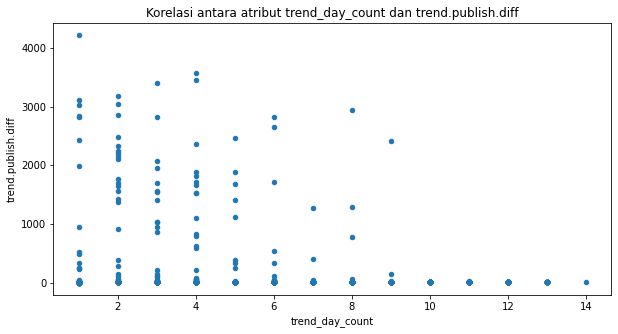

In [ ]:
#trend_day_count - trend.publish.diff
print(yt["trend_day_count"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x = "trend_day_count", y = "trend.publish.diff", title="Korelasi antara atribut trend_day_count dan trend.publish.diff", figsize=(10,5))
plt.show()

-0.08964303631915672


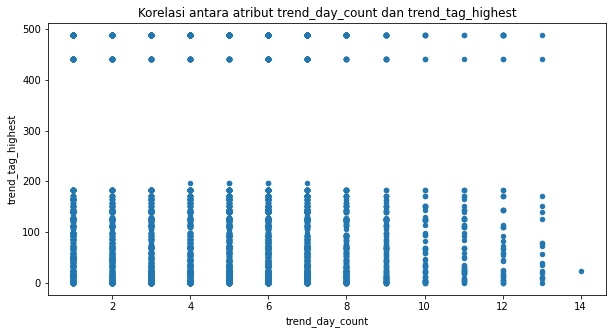

In [ ]:
#trend_day_count - trend_tag_highest
print(yt["trend_day_count"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "trend_day_count", y = "trend_tag_highest", title="Korelasi antara atribut trend_day_count dan trend_tag_highest", figsize=(10,5))
plt.show()

-0.17019102809684217


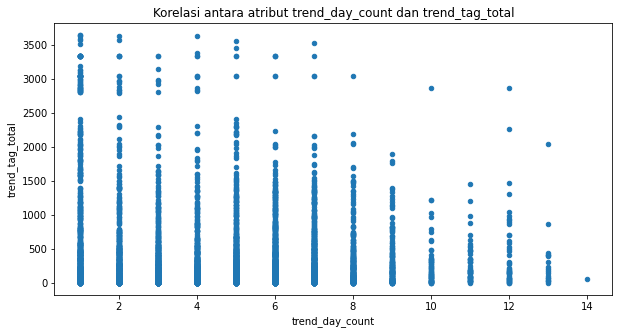

In [ ]:
#trend_day_count - trend_tag_total
print(yt["trend_day_count"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "trend_day_count", y = "trend_tag_total", title="Korelasi antara atribut trend_day_count dan trend_tag_total", figsize=(10,5))
plt.show()

-0.05410812763602234


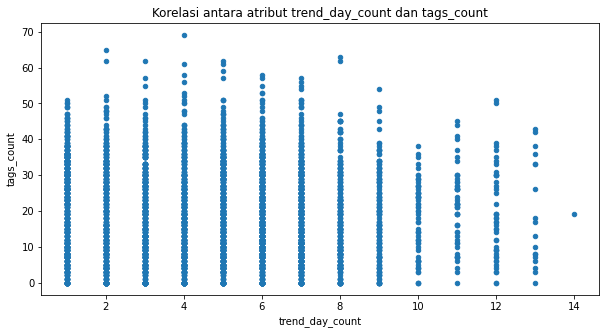

In [ ]:
#trend_day_count - tags_count
print(yt["trend_day_count"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "trend_day_count", y = "tags_count", title="Korelasi antara atribut trend_day_count dan tags_count", figsize=(10,5))
plt.show()

-0.022363037579592016


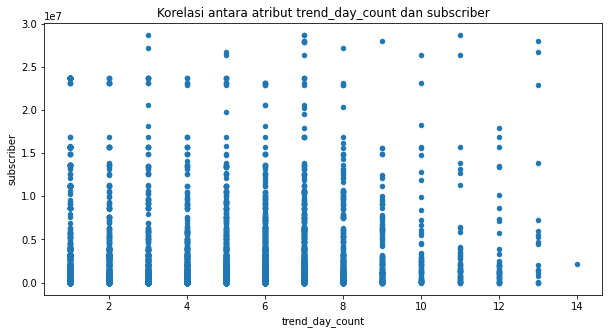

In [ ]:
#trend_day_count - subscriber
print(yt["trend_day_count"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "trend_day_count", y = "subscriber", title="Korelasi antara atribut trend_day_count dan subscriber", figsize=(10,5))
plt.show()

-0.061616358306291086


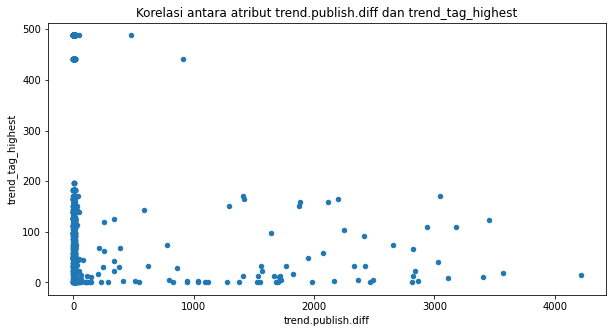

In [ ]:
#trend.publish.diff - trend_tag_highest
print(yt["trend.publish.diff"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "trend.publish.diff", y = "trend_tag_highest", title="Korelasi antara atribut trend.publish.diff dan trend_tag_highest", figsize=(10,5))
plt.show()

-0.06161084145986983


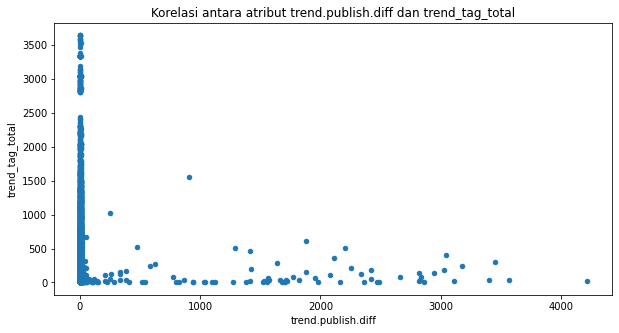

In [ ]:
#trend.publish.diff - trend_tag_total
print(yt["trend.publish.diff"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "trend.publish.diff", y = "trend_tag_total", title="Korelasi antara atribut trend.publish.diff dan trend_tag_total", figsize=(10,5))
plt.show()

-0.08406194754310709


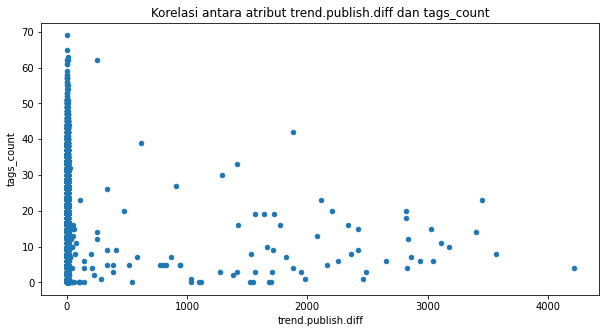

In [ ]:
#trend.publish.diff - tags_count
print(yt["trend.publish.diff"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "trend.publish.diff", y = "tags_count", title="Korelasi antara atribut trend.publish.diff dan tags_count", figsize=(10,5))
plt.show()

-0.07593672409181426


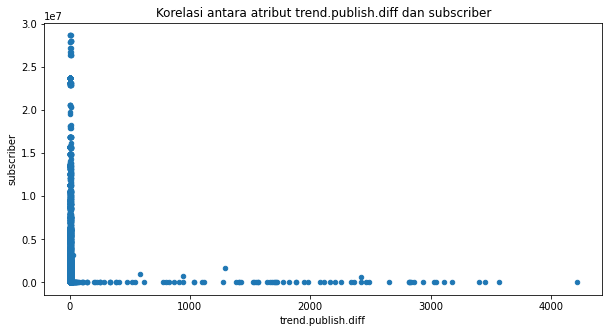

In [ ]:
#trend.publish.diff - subscriber
print(yt["trend.publish.diff"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "trend.publish.diff", y = "subscriber", title="Korelasi antara atribut trend.publish.diff dan subscriber", figsize=(10,5))
plt.show()

0.8296977939450286


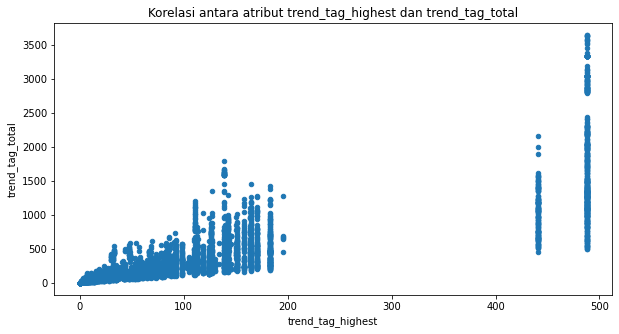

In [ ]:
#trend_tag_highest - trend_tag_total
print(yt["trend_tag_highest"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "trend_tag_highest", y = "trend_tag_total", title="Korelasi antara atribut trend_tag_highest dan trend_tag_total", figsize=(10,5))
plt.show()

0.45028019845991285


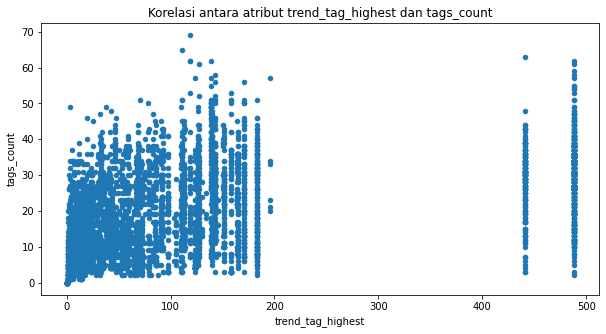

In [ ]:
#trend_tag_highest - tags_count
print(yt["trend_tag_highest"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "trend_tag_highest", y = "tags_count", title="Korelasi antara atribut trend_tag_highest dan tags_count", figsize=(10,5))
plt.show()

0.2618669375521857


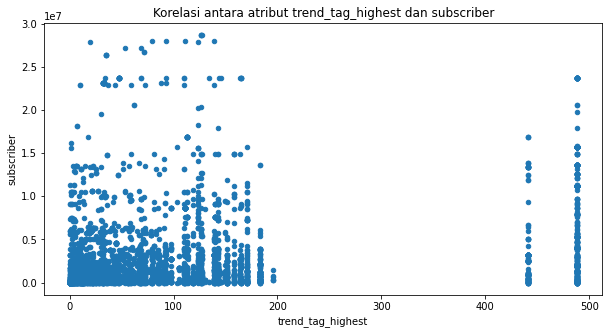

In [ ]:
#trend_tag_highest - subscriber
print(yt["trend_tag_highest"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "trend_tag_highest", y = "subscriber", title="Korelasi antara atribut trend_tag_highest dan subscriber", figsize=(10,5))
plt.show()

0.5408787066869215


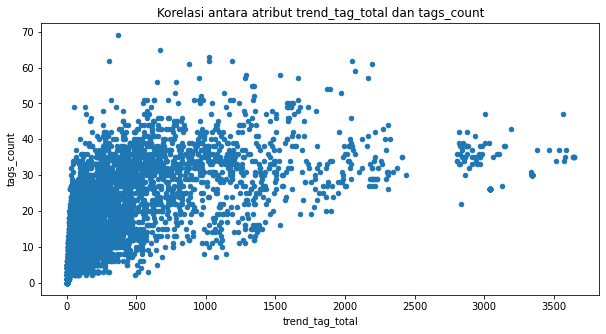

In [ ]:
#trend_tag_total - tags_count
print(yt["trend_tag_total"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "trend_tag_total", y = "tags_count", title="Korelasi antara atribut trend_tag_total dan tags_count", figsize=(10,5))
plt.show()

0.3255209865782527


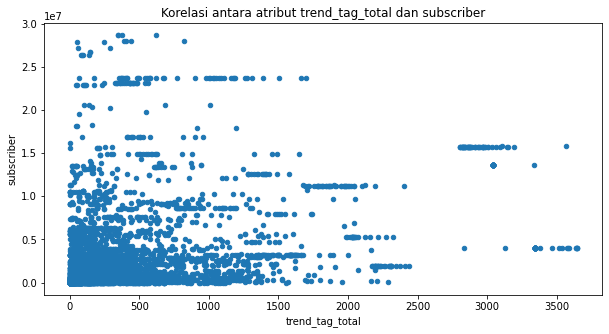

In [ ]:
#trend_tag_total - subscriber
print(yt["trend_tag_total"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "trend_tag_total", y = "subscriber", title="Korelasi antara atribut trend_tag_total dan subscriber", figsize=(10,5))
plt.show()

0.2478666471537095


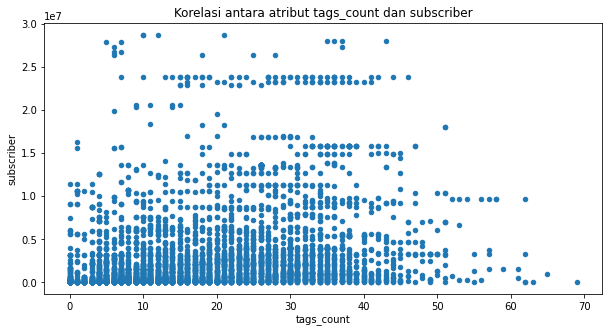

In [ ]:
#tags_count - subscriber
print(yt["tags_count"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "tags_count", y = "subscriber", title="Korelasi antara atribut tags_count dan subscriber", figsize=(10,5))
plt.show()